Candidate Number : 251046

## **PAMAP2_Dataset: Physical Activity Monitoring**

### **Introduction**

Modern world is a hub of technology and innovation.In the past decade or so, number of individuals spending time for physical activities has increased drastically. It is common to see individuals wearing smartwatch to track their day to day fitness goals. Focusing on our topic, which is physical activity monitoring: the main challenge would be measuring the activity with high accuracy in free-living conditions. The major factors influencing our physical activity are discussed in following sections. We try to find a pattern to predict any activity based on the provided dataset.
Our goal is to derive actionable insights that will allow the development of software and/or hardware to determine the amount  and type of physical activity carried out by an individual.

Given dataset includes various physical activities performed by 9 subjects (8 men & 1 woman) and data is collected from 3 inertial measurement units (IMU) and a heart rate monitor. Following tasks will be performed in the upcoming sections : 


1.   Perform exploratory data analysis to handle missing or dirty data;  
2.   Develop and test hypothesis for a relationship between a single pair of attributes;
3.   Develop and test a model which uses multiple attributes to make predictions.





*   In **Part 1**, EDA is carried out on the provided dataset as per various activities to gain insights on how one parameter affects the rest. Here, data is loaded from the files and then cleaning methods are performed. Handling of missing values, data normalization and cleaning are key activities performed here.
*   In **Part 2**, various hypothesis are tested to prove relations between pair of attributes by statistical tests. 

*   Finally, In **Part 3**, a model is created with relevant insights from the exploratory datas performed.



In [4]:
## importing all the libraries
## importing all the libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle, islice

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import cluster
from collections import defaultdict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn import svm
import csv

#### **Data Overview**

In [12]:
# opening the subject information CSV file
df = pd.read_csv(r'C:\Users\jovyj\OneDrive\Desktop\subjectInformation.csv')
df

,Subject ID,Sex,Age(years),Height(cm),Weight(kg),Resting HR(bpm),Max HR (bpm),Dominant hand
0,101,Male,27,182,83,75,193,right
1,102,Female,25,169,78,74,195,right
2,103,Male,31,187,92,68,189,right
3,104,Male,24,194,95,58,196,right
4,105,Male,26,180,73,70,194,right
5,106,Male,26,183,69,60,194,right
6,107,Male,23,173,86,60,197,right
7,108,Male,32,179,87,66,188,left
8,109,Male,31,168,65,54,189,right


Above table is obtained from '***subjectInformation.pdf***' file which comes along the dataset.It shows the 9 subject's physical parameters and the main observations are :


*   subject 8 is left handed
*   subject 2 is the only female


In [13]:
# opening the PerformedActivities Summary CSV file
df = pd.read_csv(r'C:\Users\jovyj\OneDrive\Desktop\PerformedActivitiesSummary.csv')
df

,Activity,subject101,subject102,subject103,subject104,subject105,subject106,subject107,subject108,subject109,Sum,Nr. of subjects
0,1 – lying,271.86,234.29,220.43,230.46,236.98,233.39,256.10,241.64,0.00,1925.15,8.0
1,2 – sitting,234.79,223.44,287.60,254.91,268.63,230.40,122.81,229.22,0.00,1851.80,8.0
2,3 – standing,217.16,255.75,205.32,247.05,221.31,243.55,257.50,251.59,0.00,1899.23,8.0
3,4 – walking,222.52,325.32,290.35,319.31,320.32,257.20,337.19,315.32,0.00,2387.53,8.0
4,5 – running,212.64,92.37,0.00,0.00,246.45,228.24,36.91,165.31,0.00,981.92,6.0
5,6 – cycling,235.74,251.07,0.00,226.98,245.76,204.85,226.79,254.74,0.00,1645.93,7.0
6,7 – Nordic walking,202.64,297.38,0.00,275.32,262.70,266.85,287.24,288.87,0.00,1881.00,7.0
7,9 – watching TV,836.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,836.45,1.0
8,10 – computer work,0.00,0.00,0.00,0.00,1108.82,617.76,0.00,687.24,685.49,3099.31,4.0
9,11 – car driving,545.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,545.18,1.0


Above table is obtained from 'PerformedActivitiesSummary.pdf' file and clearly '**subject 1**' , '**subject 8**' and '**subject 5**' has performed maximum activities.

## Part I : Exploratory Data Analysis

#### **Data Munging**

In [72]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [74]:
## List for filepath of each individuals
subject_files=['/content/drive/My Drive/Colab Notebooks/DSRM/Protocol/subject101.dat','/content/drive/My Drive/Colab Notebooks/DSRM/Protocol/subject102.dat','/content/drive/My Drive/Colab Notebooks/DSRM/Protocol/subject103.dat','/content/drive/My Drive/Colab Notebooks/DSRM/Protocol/subject104.dat','/content/drive/My Drive/Colab Notebooks/DSRM/Protocol/subject105.dat','/content/drive/My Drive/Colab Notebooks/DSRM/Protocol/subject106.dat','/content/drive/My Drive/Colab Notebooks/DSRM/Protocol/subject107.dat','/content/drive/My Drive/Colab Notebooks/DSRM/Protocol/subject108.dat','/content/drive/My Drive/Colab Notebooks/DSRM/Protocol/subject109.dat']

## List for main parameters
columns_main= ['timestamp','activityID','heart_rate']

## List for Hand IMU parameters
columns_IMU_hand=['hand_temperature','hand_acceleration_16g (x)','hand_acceleration_16g (y)','hand_acceleration_16g (z)','hand_acceleration_6g (x)','hand_acceleration_6g (y)','hand_acceleration_6g (z)','hand_gyroscope (x)','hand_gyroscope (y)','hand_gyroscope (z)','hand_magnetometer (x)','hand_magnetometer (y)','hand_magnetometer (z)','hand_orientation(a)','hand_orientation(b)','hand_orientation(c)','hand_orientation(d)']

## List for Chest IMU parameters
columns_IMU_chest=['chest_temperature','chest_acceleration_16g (x)','chest_acceleration_16g (y)','chest_acceleration_16g (z)','chest_acceleration_6g (x)','chest_acceleration_6g (y)','chest_acceleration_6g (z)','chest_gyroscope (x)','chest_gyroscope (y)','chest_gyroscope (z)','chest_magnetometer (x)','chest_magnetometer (y)','chest_magnetometer (z)','chest_orientation(a)','chest_orientation(b)','chest_orientation(c)','chest_orientation(d)']

## List for Ankle IMU parameters
columns_IMU_ankle=['ankle_temperature','ankle_acceleration_16g (x)','ankle_acceleration_16g (y)','ankle_acceleration_16g (z)','ankle_acceleration_6g (x)','ankle_acceleration_6g (y)','ankle_acceleration_6g (z)','ankle_gyroscope (x)','ankle_gyroscope (y)','ankle_gyroscope (z)','ankle_magnetometer (x)','ankle_magnetometer (y)','ankle_magnetometer (z)','ankle_orientation(a)','ankle_orientation(b)','ankle_orientation(c)','ankle_orientation(d)']

## Final list of column headings
columns = columns_main+columns_IMU_hand+columns_IMU_chest+columns_IMU_ankle

## Dictionary representing the activityID and corresponding tags
activity_ID = {0: 'transient activity', 1: 'lying',2 : 'sitting',3 : 'standing', 4 : 'walking', 5 : 'running',6 : 'cycling', 7 :'Nordic walking',9 :'watching TV'
,10: 'computer work', 11: 'car driving',12 : 'ascending stairs', 13 : 'descending stairs', 16: 'vacuum cleaning',17: 'ironing',18 :'folding laundry'
,19 : 'house cleaning',20 : 'playing soccer',24: 'rope jumping'}


First, a list is created with location of filenames for various subject's data which is used to create the dataframe.Then, further lists are created to store column headings for various parameters like IMU data (hand,chest and ankle) and heart rate,timestamp, activityID. Also, a dictionary is created to store activities name as well as corresponding number to comprehend which activity is being performed at the instant.

In [75]:
# Classification of activity level as per Metabolic equivalent of task (MET)

#lying, sitting, standing and ironing
light_activity = [1,2,3,17]
#vacuum cleaning,descending stairs, walking, Nordic walking and cycling
medium_activity = [16,13,4,7,6]
# ascending stairs,running and rope jumping
heavy_activity = [12,5,24]

relevant_activities=light_activity+medium_activity+heavy_activity

#Function used to classify activities
def activity_class(activity):
    if activity in light_activity:
        return 'light'
    if activity in medium_activity:
        return 'moderate'
    if activity in heavy_activity:
        return 'vigorous'


The activities in the dataset are classified as per Metabolic equivalent of task (MET):

**Light Effort** : lying, sitting, standing and ironing.

**Moderate Effort** : vacuum cleaning, descending stairs, walking, Nordic walking and cycling

**Vigorous Effort** : ascending stairs, running and rope jumping

#### **Data Collection**

In [76]:
## creating a dataframe from subjects list
all_data=pd.DataFrame()
for subject in subject_files:
    df = pd.read_table(subject, sep='\s+')
    df.columns = columns
    df['subject_id'] = subject[-7:-4]
    df['activity_level'] = df['activityID'].apply(activity_class)
    all_data = all_data.append(df, ignore_index=True)

Here,we create our initial dataframe by loading all subject's data by iterating over subjects list, which contains the file-location. Then, column names are assigned and a new column is created for **subject_id** as well as activity level.

In [77]:
print("Number of rows and columns = {}".format(all_data.shape))
all_data

Number of rows and columns = (2872524, 56)


,timestamp,activityID,heart_rate,hand_temperature,hand_acceleration_16g (x),hand_acceleration_16g (y),hand_acceleration_16g (z),hand_acceleration_6g (x),hand_acceleration_6g (y),hand_acceleration_6g (z),hand_gyroscope (x),hand_gyroscope (y),hand_gyroscope (z),hand_magnetometer (x),hand_magnetometer (y),hand_magnetometer (z),hand_orientation(a),hand_orientation(b),hand_orientation(c),hand_orientation(d),chest_temperature,chest_acceleration_16g (x),chest_acceleration_16g (y),chest_acceleration_16g (z),chest_acceleration_6g (x),chest_acceleration_6g (y),chest_acceleration_6g (z),chest_gyroscope (x),chest_gyroscope (y),chest_gyroscope (z),chest_magnetometer (x),chest_magnetometer (y),chest_magnetometer (z),chest_orientation(a),chest_orientation(b),chest_orientation(c),chest_orientation(d),ankle_temperature,ankle_acceleration_16g (x),ankle_acceleration_16g (y),ankle_acceleration_16g (z),ankle_acceleration_6g (x),ankle_acceleration_6g (y),ankle_acceleration_6g (z),ankle_gyroscope (x),ankle_gyroscope (y),ankle_gyroscope (z),ankle_magnetometer (x),ankle_magnetometer (y),ankle_magnetometer (z),ankle_orientation(a),ankle_orientation(b),ankle_orientation(c),ankle_orientation(d),subject_id,activity_level
0,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,-0.024413,0.047758,0.006474,14.8991,-69.2224,-5.82311,1.000000,0.000000,0.000000,0.000000,31.8125,0.319530,9.61282,-1.493280,0.234939,9.78539,-1.428460,0.013685,0.001486,-0.041522,1.016900,-50.3966,43.1768,1.000000,0.000000,0.000000,0.000000,30.3125,9.69370,-1.579020,-0.215687,9.61670,-1.616300,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,101,None
1,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,-0.057976,0.032574,-0.006988,14.2420,-69.5197,-5.12442,1.000000,0.000000,0.000000,0.000000,31.8125,0.235593,9.72421,-1.766210,0.173850,9.72528,-1.518940,-0.039923,0.034056,-0.002113,0.383136,-51.8336,43.7782,1.000000,0.000000,0.000000,0.000000,30.3125,9.58944,-1.732760,0.092914,9.63173,-1.586050,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,101,None
2,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,-0.002352,0.032810,-0.003747,14.8908,-69.5439,-6.17367,1.000000,0.000000,0.000000,0.000000,31.8125,0.388697,9.53572,-1.724100,0.157969,9.64994,-1.579520,0.007513,-0.010498,-0.020684,0.315400,-49.8144,43.1670,1.000000,0.000000,0.000000,0.000000,30.3125,9.58814,-1.770400,0.054545,9.63197,-1.631350,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,101,None
3,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,0.012269,0.018305,-0.053325,15.5612,-68.8196,-6.28927,1.000000,0.000000,0.000000,0.000000,31.8125,0.315800,9.49908,-1.609140,0.233506,9.57411,-1.444180,-0.003822,-0.011217,-0.025975,-0.297733,-51.8097,43.6453,1.000000,0.000000,0.000000,0.000000,30.3125,9.69771,-1.656250,-0.060809,9.64699,-1.646470,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,101,None
4,8.43,0,NaN,30.0000,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,0.003238,0.012260,-0.054474,15.4565,-68.8180,-5.94087,1.000000,0.000000,0.000000,0.000000,31.8125,0.321072,9.76369,-1.455020,0.264123,9.55880,-1.338620,0.011702,0.017761,-0.036490,-0.007063,-50.3645,43.4065,1.000000,0.000000,0.000000,0.000000,30.3125,9.69551,-1.655600,-0.138014,9.64687,-1.616260,0.310598,-0.006089,-0.016024,0.001050,-60.2954,-38.87780,-58.397700,1.000000,0.000000,0.000000,0.000000,101,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872519,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,1.784060,0.087985,0.934673,21.1701,-35.3878,-34.04430,0.558630,-0.593878,0.292228,0.499

Taking a glance at the above table, the underlying requisite of data clensing is evident. The readme file along with the dataset explains about various missing data, for instance the '**activityID 0**', which is *transient period* and must be removed from the analysis. Data cleaning will be done thoroughly in the following section.

In [78]:
### backup of datset 
bkp_data =all_data

#### **Data Cleansing**

Due to wireless data dropping, few sensory datas are missing and corresponding values are indicated with NaN. Since data is given every 0.01s meaning the sampling frequency of the HR-monitor is less, the missing HR-values are also indicated with NaN in the data-files. Also, each activity has NaN values for various subjects as most subjects did not perform all activities. To begin with, all Nan values of ***transient activity*** is dropped and also, the ***orientation*** colums are dropped as the data is irrelevant. The ***6g accelerometer*** is not precisely calibrated and due to high impacts caused by certain movements (e.g.running) with acceleration over 6g gets saturated. Hence, we refer only the data from the first accelerometer (with the scale of ±16g).

In [79]:
## removal of transient activity
all_data = all_data.drop(all_data[all_data['activityID']==0].index)

## removal of orientation columns as they are irrelevant
all_data = all_data.drop (['hand_orientation(a)','hand_orientation(b)','hand_orientation(c)','hand_orientation(d)','chest_orientation(a)','chest_orientation(b)','chest_orientation(c)','chest_orientation(d)','ankle_orientation(a)','ankle_orientation(b)','ankle_orientation(c)','ankle_orientation(d)'],axis=1)

## removal of 6g accelerometer
all_data = all_data.drop (['hand_acceleration_6g (x)','hand_acceleration_6g (y)','hand_acceleration_6g (z)','ankle_acceleration_6g (x)','ankle_acceleration_6g (y)','ankle_acceleration_6g (z)'],axis=1)

In [80]:
print("Number of rows and columns = {}".format(all_data.shape))

Number of rows and columns = (1942872, 38)


In [81]:
## finding missing heartrates
total_cells = np.product(all_data['heart_rate'].shape)
total_missing = all_data['heart_rate'].isnull().sum()
print('Total missing heart rate vales = {}'.format(total_cells-total_missing))
print('Percentage of missing Heart Rate Values =',((1-(total_cells-total_missing)/total_cells)*100),'%')

Total missing heart rate vales = 177408
Percentage of missing Heart Rate Values = 90.86877570936223 %


Heart rate data is very crucial for the analysis and a whopping **90%** of the heart rate values are missing in the given dataset. This shows the irregularities in data acquisition. For instance, when the real-time requirement of the system is high, the machine has no time to judge and make decisions. This is a major challenge in the provided dataset and a judgement has to be taken whether to drop NaN or interpolate. I decided to drop all NaN, since the sample is obtained from data collected at 0.01s interval and data removed for certain interval of time does not affect our final goal, which is to co-relate each features of dataset.

In [82]:
## seperating subjects who performed maximum activities
filtered_subject1_data = all_data[all_data["subject_id"]=="101"]
filtered_subject8_data = all_data[all_data["subject_id"]=="108"]

From the activities performed chart showed initially, **Subject1** and **Subject2** needs to be considered for analyzing any effect of dropping heart rate NaN values as they have the maximum activities. This can be visualized by plotting 2 graphs :

*   a. Actual Dataset before dropping NaN's
*   b. After transformation



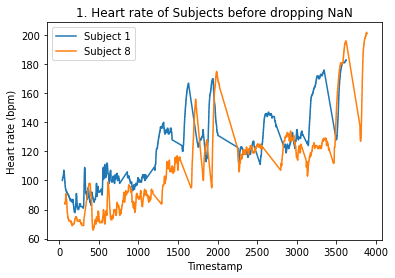

In [83]:
## heart rate graph before dropping NaN values
plt.title('1. Heart rate of Subjects before dropping NaN')
plt.xlabel('Timestamp')
plt.ylabel('Heart rate (bpm)')
read_data=filtered_subject1_data.iloc[:,:-1].dropna(axis=0,how='any')
read_data=read_data.drop(['activityID'],axis=1).astype(float).dropna(axis=0,how='any')
plt.plot(read_data['timestamp'].values.astype(float),read_data['heart_rate'].values.astype(float),label='Subject 1')

read_data=filtered_subject8_data.iloc[:,:-1].dropna(axis=0,how='any')
read_data=read_data.drop(['activityID'],axis=1).astype(float).dropna(axis=0,how='any')
plt.plot(read_data['timestamp'].values.astype(float),read_data['heart_rate'].values.astype(float),label='Subject 8')
plt.legend()
plt.show()

As per above chart of heart rate data,  values of heart rate varyation with timeperiod for 'subject 1' and 'subject 8' is captured.

In [84]:
## removal of any NaN values across the dataset
all_data = all_data.dropna()
all_data.reset_index(drop = True, inplace = True)

Here, dropping of all NaN values are completed.

In [85]:
## seperating subjects who performed maximum activities
filtered_subject1_data = all_data[all_data["subject_id"]=="101"]
filtered_subject8_data = all_data[all_data["subject_id"]=="108"]

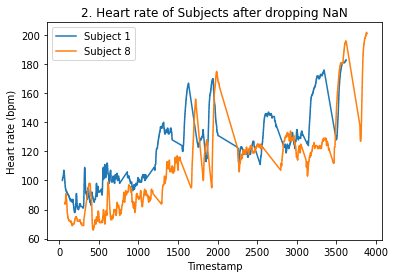

In [86]:
## heart rate graph after dropping NaN values
plt.title('2. Heart rate of Subjects after dropping NaN')
plt.xlabel('Timestamp')
plt.ylabel('Heart rate (bpm)')
read_data=filtered_subject1_data.iloc[:,:-1].dropna(axis=0,how='any')
read_data=read_data.drop(['activityID'],axis=1).astype(float).dropna(axis=0,how='any')
plt.plot(read_data['timestamp'].values.astype(float),read_data['heart_rate'].values.astype(float),label='Subject 1')

read_data=filtered_subject8_data.iloc[:,:-1].dropna(axis=0,how='any')
read_data=read_data.drop(['activityID'],axis=1).astype(float).dropna(axis=0,how='any')
plt.plot(read_data['timestamp'].values.astype(float),read_data['heart_rate'].values.astype(float),label='Subject 8')
plt.legend()
plt.show()

Comparing graph 1 & 2, it is clear that the effect of dropping NaN values are not at all significant. If we had interpolated the NaN, variance of data would be traded for future analysis.

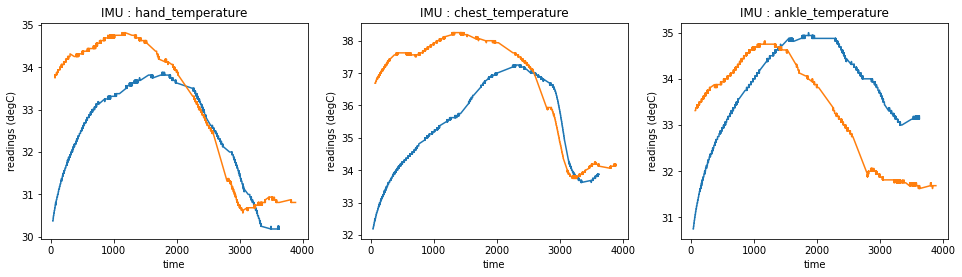

In [87]:
##plotting 'IMU : hand_temperature' readings based on timestamp
plt.figure(figsize=(3,3))
plt.subplots_adjust(2,2,6.2,3)
plt.subplot(131)
plt.title('IMU : hand_temperature')
plt.xlabel('time')
plt.ylabel('readings (degC)')
plt.plot(filtered_subject1_data['timestamp'].values,filtered_subject1_data['hand_temperature'].values)
plt.plot(filtered_subject8_data['timestamp'].values,filtered_subject8_data['hand_temperature'].values)

##plotting 'IMU : chest_temperature' readings based on timestamp
plt.subplot(132)
plt.title('IMU : chest_temperature')
plt.xlabel('time')
plt.ylabel('readings (degC)')
plt.plot(filtered_subject1_data['timestamp'].values,filtered_subject1_data['chest_temperature'].values)
plt.plot(filtered_subject8_data['timestamp'].values,filtered_subject8_data['chest_temperature'].values)

##plotting 'IMU : ankle_temperature' readings based in timestamp
plt.subplot(133)
plt.xlabel('time')
plt.ylabel('readings (degC)')
plt.title('IMU : ankle_temperature')
plt.plot(filtered_subject1_data['timestamp'].values,filtered_subject1_data['ankle_temperature'].values)
plt.plot(filtered_subject8_data['timestamp'].values,filtered_subject8_data['ankle_temperature'].values)

Here, the chest temperature is peak at around 36 DegC, which is in normal human body temperature range.

In [88]:
## storing the data into a new variable
df_new = all_data
df_new

,timestamp,activityID,heart_rate,hand_temperature,hand_acceleration_16g (x),hand_acceleration_16g (y),hand_acceleration_16g (z),hand_gyroscope (x),hand_gyroscope (y),hand_gyroscope (z),hand_magnetometer (x),hand_magnetometer (y),hand_magnetometer (z),chest_temperature,chest_acceleration_16g (x),chest_acceleration_16g (y),chest_acceleration_16g (z),chest_acceleration_6g (x),chest_acceleration_6g (y),chest_acceleration_6g (z),chest_gyroscope (x),chest_gyroscope (y),chest_gyroscope (z),chest_magnetometer (x),chest_magnetometer (y),chest_magnetometer (z),ankle_temperature,ankle_acceleration_16g (x),ankle_acceleration_16g (y),ankle_acceleration_16g (z),ankle_gyroscope (x),ankle_gyroscope (y),ankle_gyroscope (z),ankle_magnetometer (x),ankle_magnetometer (y),ankle_magnetometer (z),subject_id,activity_level
0,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,9.156260,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.173568,9.69512,-1.53414,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,101,light
1,37.81,1,100.0,30.375,2.24615,7.48180,5.55219,-0.431227,0.002685,-0.062964,9.146120,-67.3936,-20.5508,32.1875,0.125825,9.72560,-1.61331,0.143761,9.71023,-1.50369,-0.029411,-0.037321,-0.033805,1.113440,-50.1898,44.6495,30.75,9.73536,-2.03681,0.019118,0.005819,-0.017912,0.015243,-60.7820,-36.211600,-58.489100,101,light
2,37.92,1,100.0,30.375,2.30000,7.10681,6.09309,0.075692,-0.030792,0.005246,9.691630,-67.0898,-21.2481,32.1875,0.199567,9.64954,-1.68917,0.083704,9.75569,-1.53342,-0.009560,-0.055878,-0.044714,1.032800,-50.8441,43.1765,30.75,9.73745,-1.84729,0.056553,0.015376,-0.011798,0.011387,-61.4531,-36.298300,-58.484500,101,light
3,38.03,1,100.0,30.375,2.49455,7.52335,6.17157,-0.259058,-0.267895,-0.038533,9.586940,-67.0882,-20.8997,32.1875,0.279626,9.80069,-1.57205,0.114698,9.78564,-1.41262,-0.067753,0.020297,-0.012148,0.671351,-50.2744,43.2943,30.75,9.58444,-1.84538,-0.060796,-0.012672,-0.009233,0.005823,-62.0065,-36.721700,-58.360800,101,light
4,38.14,1,101.0,30.375,2.71654,8.30596,4.78671,0.377115,-0.023688,-0.020670,8.596220,-67.1486,-20.1947,32.1875,0.428255,9.64882,-1.68503,0.218926,9.60427,-1.39866,0.007856,0.001881,-0.058687,2.177730,-51.2222,43.6836,30.75,9.69963,-1.92299,0.056635,0.050959,-0.042562,-0.009289,-60.4311,-37.541200,-59.001300,101,light
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175493,94.66,24,162.0,25.125,4.78601,6.75444,7.05521,-0.092524,-0.060432,-0.111549,0.085601,-20.3733,-48.5282,32.3750,-0.478518,9.49421,-2.70770,-0.615026,9.56235,-2.46675,0.070842,0.069814,-0.013575,20.332000,-34.3920,26.4139,31.50,9.59830,-2.13225,-2.142710,-0.022888,0.020064,-0.022287,-46.0304,-1.464080,-0.453931,109,vigorous
175494,94.77,24,162.0,25.125,4.34732,6.90337,6.35537,-0.303158,-0.255639,-0.230901,-0.058377,-19.0004,-48.4050,32.3750,-0.433341,9.57095,-2.47480,-0.463634,9.53155,-2.27129,0.033378,-0.151611,-0.049037,19.808200,-34.1150,26.6907,31.50,9.25937,-2.31964,-2.183610,-0.002293,-0.004692,0.009044,-45.5269,-0.843791,0.114449,109,vigorous
175495,94.88,24,162.0,25.125,4.70704,6.59291,5.89995,0.064261,-0.406750,0.055630,-1.420250,-19.0522,-48.9268,32.3750,-0.279640,9.60839,-2.43342,-0.522882,9.57682,-2.16501,-0.209105,-0.228297,0.017236,20.969800,-34.1578,26.5580,31.50,9.29629,-2.20565,-2.222530,-0.029348,-0.020501,-0.036864,-45.6476,-1.094840,0.256148,109,vigorous
175496,94.98,24,162.0,25.125,4.81452,6.51482,5.74788,-0.191101,-0.290927,0.172182,-3.300640,-18.3308,-48.1400,32.3750,-0.364521,9.79482,-2.74533,-0.478755,9.78856,-2.55759,-0.226602,-0.212727,0.085241,20.618900,-34.7880,25.0081,31.50,9.48531,-2.05528,-2.182940,-0.036682,-0.011895,-0.017897,-45.9167,-0.437698,0.254439,109,vigorous


In [89]:
print("Final Number of rows and columns in Dataset = {}".format(all_data.shape))

Final Number of rows and columns in Dataset = (175498, 38)


In [90]:
## checking if any null values exist in dataframe
df_new.isnull().sum()

timestamp                     0
activityID                    0
heart_rate                    0
hand_temperature              0
hand_acceleration_16g (x)     0
hand_acceleration_16g (y)     0
hand_acceleration_16g (z)     0
hand_gyroscope (x)            0
hand_gyroscope (y)            0
hand_gyroscope (z)            0
hand_magnetometer (x)         0
hand_magnetometer (y)         0
hand_magnetometer (z)         0
chest_temperature             0
chest_acceleration_16g (x)    0
chest_acceleration_16g (y)    0
chest_acceleration_16g (z)    0
chest_acceleration_6g (x)     0
chest_acceleration_6g (y)     0
chest_acceleration_6g (z)     0
chest_gyroscope (x)           0
chest_gyroscope (y)           0
chest_gyroscope (z)           0
chest_magnetometer (x)        0
chest_magnetometer (y)        0
chest_magnetometer (z)        0
ankle_temperature             0
ankle_acceleration_16g (x)    0
ankle_acceleration_16g (y)    0
ankle_acceleration_16g (z)    0
ankle_gyroscope (x)           0
ankle_gy

From above, It is clear that there are no missing values and thus we proceed with further analysis.

In [91]:
## giving names to activityID
df_new.activityID=df_new.activityID.apply(lambda x:activity_ID[x])

In [92]:
df_new.describe()

,timestamp,heart_rate,hand_temperature,hand_acceleration_16g (x),hand_acceleration_16g (y),hand_acceleration_16g (z),hand_gyroscope (x),hand_gyroscope (y),hand_gyroscope (z),hand_magnetometer (x),hand_magnetometer (y),hand_magnetometer (z),chest_temperature,chest_acceleration_16g (x),chest_acceleration_16g (y),chest_acceleration_16g (z),chest_acceleration_6g (x),chest_acceleration_6g (y),chest_acceleration_6g (z),chest_gyroscope (x),chest_gyroscope (y),chest_gyroscope (z),chest_magnetometer (x),chest_magnetometer (y),chest_magnetometer (z),ankle_temperature,ankle_acceleration_16g (x),ankle_acceleration_16g (y),ankle_acceleration_16g (z),ankle_gyroscope (x),ankle_gyroscope (y),ankle_gyroscope (z),ankle_magnetometer (x),ankle_magnetometer (y),ankle_magnetometer (z)
count,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000,175498.000000
mean,1694.983481,107.314043,32.761121,-4.944893,3.567724,3.611669,0.002260,0.041288,-0.003601,21.026355,-13.981177,-24.443168,36.181686,0.333002,8.163620,-1.440916,0.198043,8.155212,-1.113988,0.005949,0.011426,-0.023486,4.512293,-30.583771,4.550784,33.714976,9.374464,-0.165350,-2.595166,0.008643,-0.032007,0.006871,-31.531908,1.396133,17.242890
std,1091.288920,26.952555,1.790775,6.253443,6.944834,3.953579,1.326568,0.950139,1.597604,23.814774,24.214329,20.113246,1.492995,1.753649,4.882703,4.776700,1.739352,4.835962,4.789951,0.445262,0.564351,0.316435,17.063686,17.569752,21.624649,1.091955,6.634944,7.674596,3.971392,1.113769,0.628935,1.991745,18.387229,21.684751,19.753212
min,31.220000,57.000000,24.875000,-94.135900,-82.550900,-69.093500,-28.135400,-9.354930,-13.121500,-102.914000,-197.803000,-163.766000,31.937500,-39.203400,-38.165700,-46.599900,-27.598400,-33.053100,-49.776500,-9.343510,-4.859470,-3.705010,-69.617200,-122.480000,-66.428400,30.000000,-76.722200,-155.513000,-158.830000,-11.125300,-7.324840,-11.539700,-172.236000,-135.604000,-100.864000
25%,739.225000,86.000000,31.687500,-8.952885,1.044670,1.165758,-0.376981,-0.219975,-0.376287,4.746878,-29.021200,-38.822725,35.187500,-0.510282,5.965982,-4.205303,-0.627483,5.919750,-3.882107,-0.109558,-0.135211,-0.130079,-6.076035,-39.893025,-9.817638,33.000000,8.401260,-2.167257,-3.811535,-0.203178,-0.102719,-0.426863,-41.708675,-12.466675,3.705748
50%,1467.170000,104.000000,33.187500,-5.421325,3.521345,3.435940,-0.006174,0.006064,-0.005747,22.827900,-16.118100,-23.968000,36.437500,0.438897,9.198975,-1.465785,0.309752,9.138715,-1.106565,0.002699,0.000539,-0.016973,2.739820,-33.369900,2.928840,34.062500,9.534675,-0.293458,-2.417440,0.004730,-0.003612,-0.002052,-33.910700,0.787800,18.771050
75%,2654.185000,124.000000,34.062500,-0.938708,6.463538,6.550817,0.334158,0.266312,0.364776,39.235275,2.107205,-11.210600,37.437500,1.125860,9.776100,0.527624,0.973023,9.796717,0.944025,0.111307,0.164973,0.082138,13.951700,-23.957425,20.192275,34.500000,10.259300,1.784900,-1.040315,0.127148,0.115690,0.090185,-17.770000,17.822500,31.244975
max,4245.650000,202.000000,35.500000,60.912600,155.354000,65.302700,17.994100,23.077900,13.672200,137.537000,97.706300,99.895700,38.562500,22.138700,125.735000,31.395600,23.910100,61.937300,28.252000,15.152200,5.822480,2.703920,77.300300,39.224800,96.102200,35.437500,155.655000,155.799000,97.672100,12.628500,6.410380,14.288100,82.818800,90.478100,138.163000


Above table provides a summary of various statistics, which can be quite useful for gaining useful insights.

#### **Splitting Dataset into Train & Test**

In [93]:
## Dataset information prior to Split
print('Dataset information prior to Split\n')
print('Size of the data: ', df_new.size)
print('Shape of the data: ', df_new.shape)
print('Number of columns in the data: ', len(df_new.columns))
result_id = df_new.groupby(['subject_id']).mean().reset_index()
print('Number of "subjects" in the data: ', len(result_id))
result_act = df_new.groupby(['activityID']).mean().reset_index()
print('Number of "activities" in the data: ',len(result_act))

Dataset information prior to Split

Size of the data:  6668924
Shape of the data:  (175498, 38)
Number of columns in the data:  38
Number of "subjects" in the data:  9
Number of "activities" in the data:  12


In [94]:
## Splitting Dataset into Training & Testing 
my_training_data = df_new.sample(frac=0.8, random_state=1)
my_testing_data = df_new.drop(my_training_data.index)

Perfore performing any EDA, first the dataset is split into "Testing" and "Training" datasets. Here, **80%** of the dataset is kept as training dataset and the rest is considered for testing. This is considerd as an industry standard for most Machine learining models. In any scenario, the model has to be predicting the inputs accurately. So, the model should not be having all the dataset while training as the performance of the same can be evaluated only by unseen datas.

In [95]:
## Dataset information after Split
print('Dataset information after split :\n')
print('Size of the data: ', my_training_data.size)
print('Shape of the data: ', my_training_data.shape)
print('Number of columns in the data: ', len(my_training_data.columns))
result_id = my_training_data.groupby(['subject_id']).mean().reset_index()
print('Number of "subjects" in the data: ', len(result_id))
result_act = my_training_data.groupby(['activityID']).mean().reset_index()
print('Number of "activities" in the data: ',len(result_act))

Dataset information after split :

Size of the data:  5335124
Shape of the data:  (140398, 38)
Number of columns in the data:  38
Number of "subjects" in the data:  9
Number of "activities" in the data:  12


Taking a look at the above list, the information to create our model is understood.

Training Dataset by Activity Intensity


activity_level
light       58686
moderate    62731
vigorous    18981
Name: activityID, dtype: int64

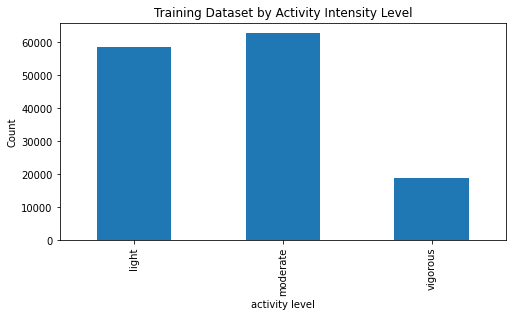

In [96]:
## plotting Training Dataset by Activity Intensity
activity_class = my_training_data.groupby('activity_level').count()['activityID']
print(('Training Dataset by Activity Intensity'))
display(activity_class)

ax = activity_class.plot(kind='bar', figsize=(8,4))
_ = ax.set_ylabel('Count')
_ = ax.set_xlabel('activity level')
_ = ax.set_title('Training Dataset by Activity Intensity Level')

Here, Individuals performing various activities based on the MET tags is displayed.

#### **Data Inbalance Analysis**

In [97]:
print("Training data is displayed below {}".format(my_training_data.head()))

Training data is displayed below         timestamp       activityID  ...  subject_id  activity_level
119017    1491.67  vacuum cleaning  ...         106        moderate
20674     3258.58          running  ...         101        vigorous
1052       152.88            lying  ...         101           light
111406     576.84          sitting  ...         106           light
98999     2429.16          walking  ...         105        moderate

[5 rows x 38 columns]


In [98]:
print("Various statistics of Training data is displayed below {}".format(my_training_data.head()))

Various statistics of Training data is displayed below         timestamp       activityID  ...  subject_id  activity_level
119017    1491.67  vacuum cleaning  ...         106        moderate
20674     3258.58          running  ...         101        vigorous
1052       152.88            lying  ...         101           light
111406     576.84          sitting  ...         106           light
98999     2429.16          walking  ...         105        moderate

[5 rows x 38 columns]


Correlation of every columns are easily observed by using the Pandas correlation method.By default, Pearsons correlation method is considered for calculating correlation.

Training Dataset Information


activityID
Nordic walking       13505
ascending stairs      8533
cycling              11980
descending stairs     7681
ironing              17305
lying                14061
rope jumping          3516
running               6932
sitting              13494
standing             13826
vacuum cleaning      12857
walking              16708
Name: activityID, dtype: int64

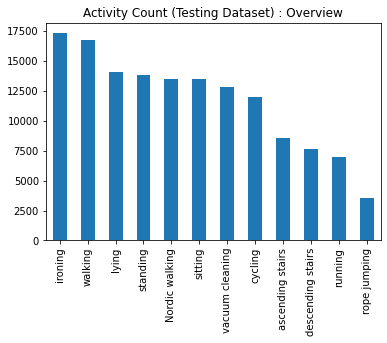

In [99]:
## Training Dataset Information by activities
print(('Training Dataset Information'))
display(my_training_data.groupby(['activityID'])['activityID'].count())
## Plotting Activity counts
plt.title('Activity Count (Testing Dataset) : Overview')
my_training_data.activityID.value_counts().plot(kind='bar')
plt.show()

From above table, it is evident that **ironing** and **walking** has most number of data points followed by *lying* and *standing*.

### EDA 

The correlation between various featues are identified by plotting various graphs/ charts. These visualizations would help us in gaining valuable insights.

In [100]:
## function to plot various graphs
def my_pandas_plot(param,column_a,column_b,title, figsize=(8,4)):
    plt.rcParams.update({'font.size': 12})
    size = range(len(param))
    f, ax = plt.subplots(figsize=figsize) 
    plt.bar(size, param[column_a], color=plt.cm.Paired(size))
    a = ax.set_xticklabels(param[column_b])
    #b = ax.legend(fontsize = 15)
    c = ax.set_xticks(np.arange(len(param)))
    d = ax.set_title(title)  
    plt.show()

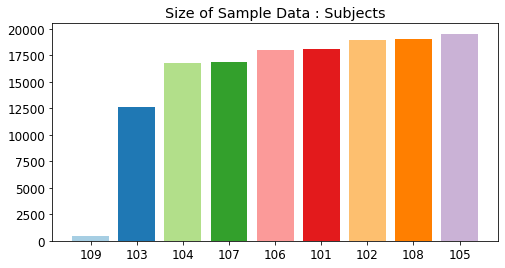

In [101]:
## plotting samples_to_subject
samples = my_training_data.groupby(['subject_id']).count().reset_index()
samples_to_subject = pd.DataFrame()
samples_to_subject['subject_id'] = samples['subject_id']
samples_to_subject['samples'] = samples['timestamp']
samples_to_subject = samples_to_subject.sort_values(by=['samples'])
my_pandas_plot(samples_to_subject,'samples','subject_id','Size of Sample Data : Subjects')
plt.show()

'**Subject 9'** has very few data whereas '**Subject 5**' has got the maximum datapoints.

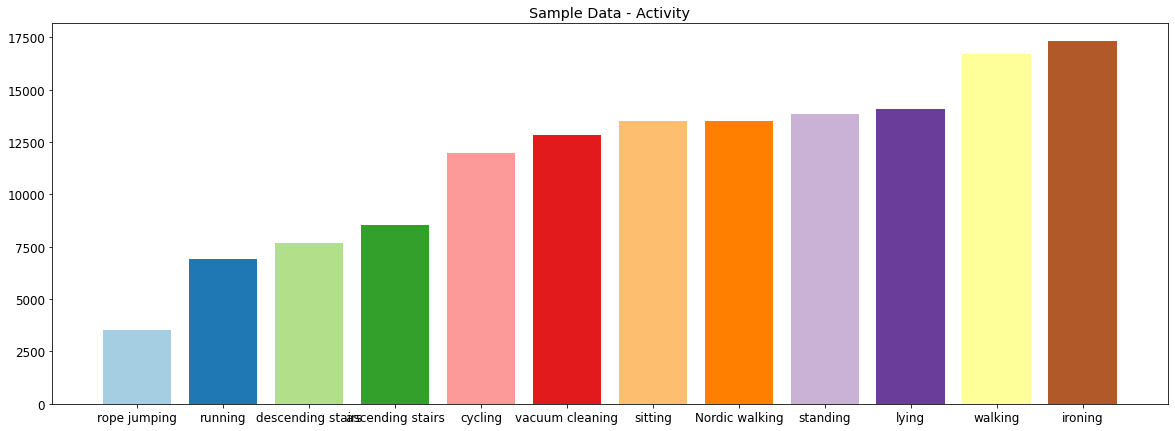

In [102]:
# plotting samples_to_activities
samples = my_training_data.groupby(['activityID']).count().reset_index()
samples_to_activities = pd.DataFrame()
samples_to_activities['activity'] = samples['activityID']
samples_to_activities['samples'] = samples['timestamp']
samples_to_activities = samples_to_activities.sort_values(by=['samples'])
my_pandas_plot(samples_to_activities,'samples','activity','Sample Data - Activity',figsize=(20,7))
plt.show()

'**rope jumping**' activity got least samples than other activities and '**ironing**' and '**walking**' has highest datapoints.   
From the above graphs, It is clear that provided dataset has got class inbalance. Now, heart rate details are compared.

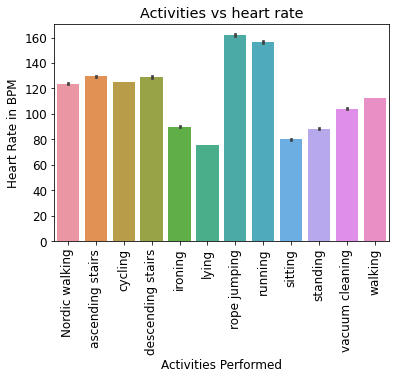

In [103]:
## plotting heart rate against each activities
heart_rate_data=my_training_data[['activityID','heart_rate']]
heart_rate_data.activityID=my_training_data.activityID.astype("category")
plt.xticks(rotation=90)
sns.barplot(x='activityID',y='heart_rate',data=heart_rate_data)
plt.ylabel('Heart Rate in BPM')
plt.xlabel('Activities Performed')
plt.title('Activities vs heart rate')
plt.show()

Above graph illustrates **performed activity** and its corresponding **heart rates**.It is clear that '**rope jumping**' is the most severe activity followed by '**running**'. Also, '**lying**' is the least severe among the lot.

#### EDA based on Heart Rate

More detailed analysis is performed below, giving focus on Heart rate.

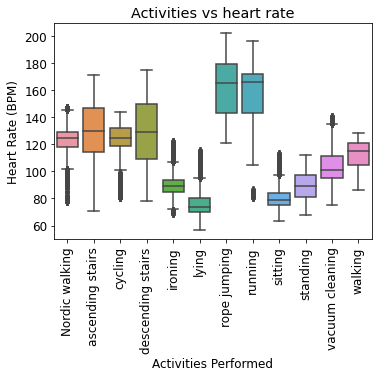

In [104]:
## plotting Activities vs heart rate
heart_rate_data.activityID=heart_rate_data.activityID.astype("category")
plt.figure(figsize=(5,3))
plt.subplots_adjust(2,1,5,2)
plt.subplot(131)

plt.xticks(rotation=90)
sns.boxplot(x='activityID',y='heart_rate',data=heart_rate_data)
plt.ylabel('Heart Rate (BPM)')
plt.xlabel('Activities Performed')
plt.title('Activities vs heart rate')
plt.show()

From above box plot, the relation between various activities and its corresponding heart rate is understood. Also,the outliers for each corresponding activities are visible.The need for classifying the activities according to their severity is well understood here. Further visualization is possible with heat maps for better understanding of relation between heart rates and activities, based on MET tags. On a promising note, the outliers are present only for certain activities. 

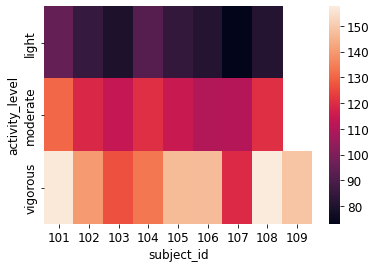

In [105]:
## plotting heatmap for Activity intensity of various subjects based on heart rates
act_heart_df = my_training_data.groupby(['activity_level','subject_id'], as_index=False).mean() \
            [['activity_level','subject_id','heart_rate']].pivot(index='activity_level', columns='subject_id', values='heart_rate')

sns.heatmap(act_heart_df)

From the above heat map, the relationship between activity intensity of each subjects based on their heart rates is  understood. There is a significant relation between heart rates and activity level for vigorous and moderate tags.

#### Explorations based on Temperature

Now, further explorations are carried out based on Temperature and various features.

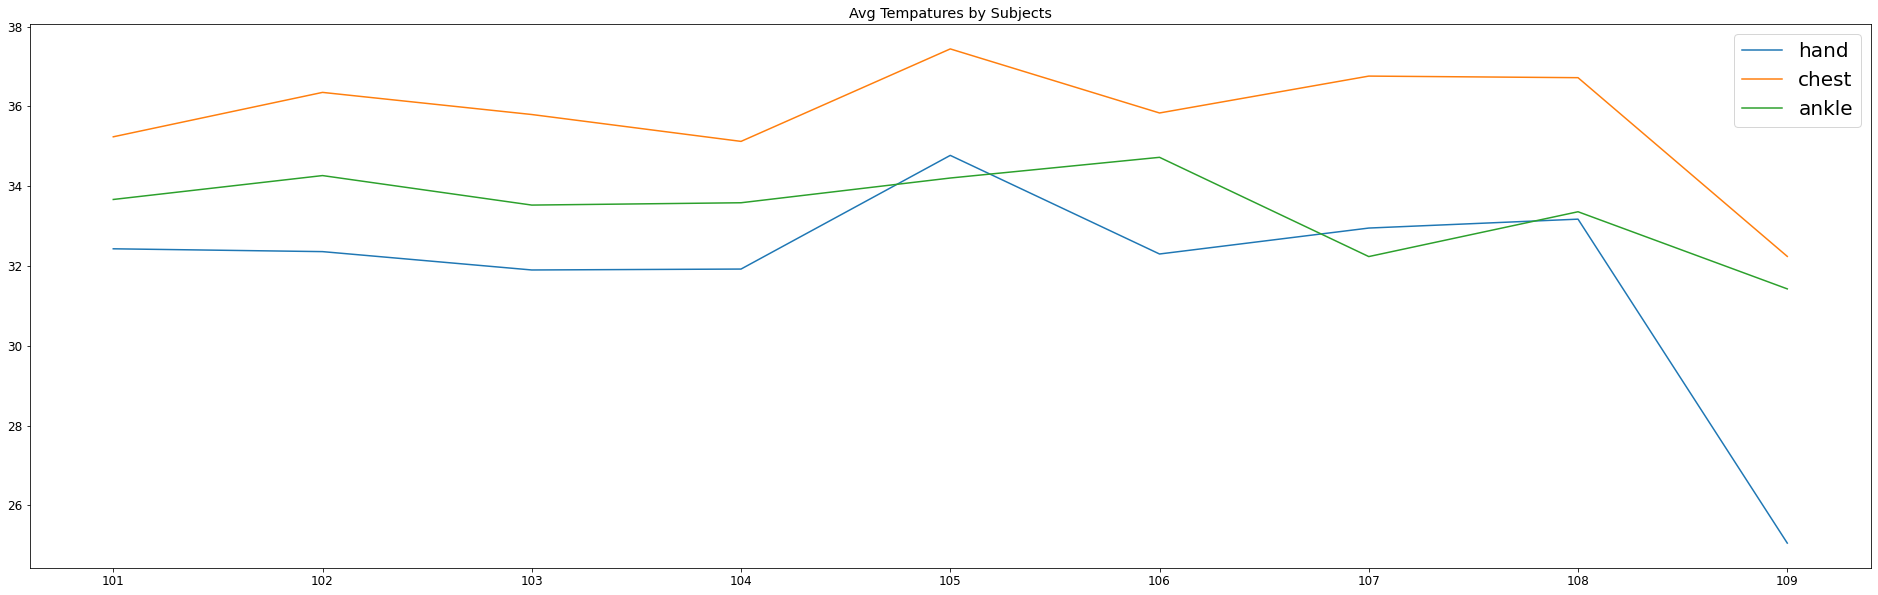

In [106]:
## plotting hand,chest and ankle temperature of various subjects
samples_temp = pd.DataFrame()
samples_temp['hand'] = result_id['hand_temperature']
samples_temp['chest'] = result_id['chest_temperature']
samples_temp['ankle'] = result_id['ankle_temperature']

ax = samples_temp.plot(kind='line', figsize=(33,10), title='Avg Tempatures by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samples_temp)))

Above line graph shows three data : 


*   Hand Temperature
*   Chest Temperature
*   Ankle Temperature

'**subject5**' has the observed the highest temperature whereas '**subject9**' has very low temperature for some reason.

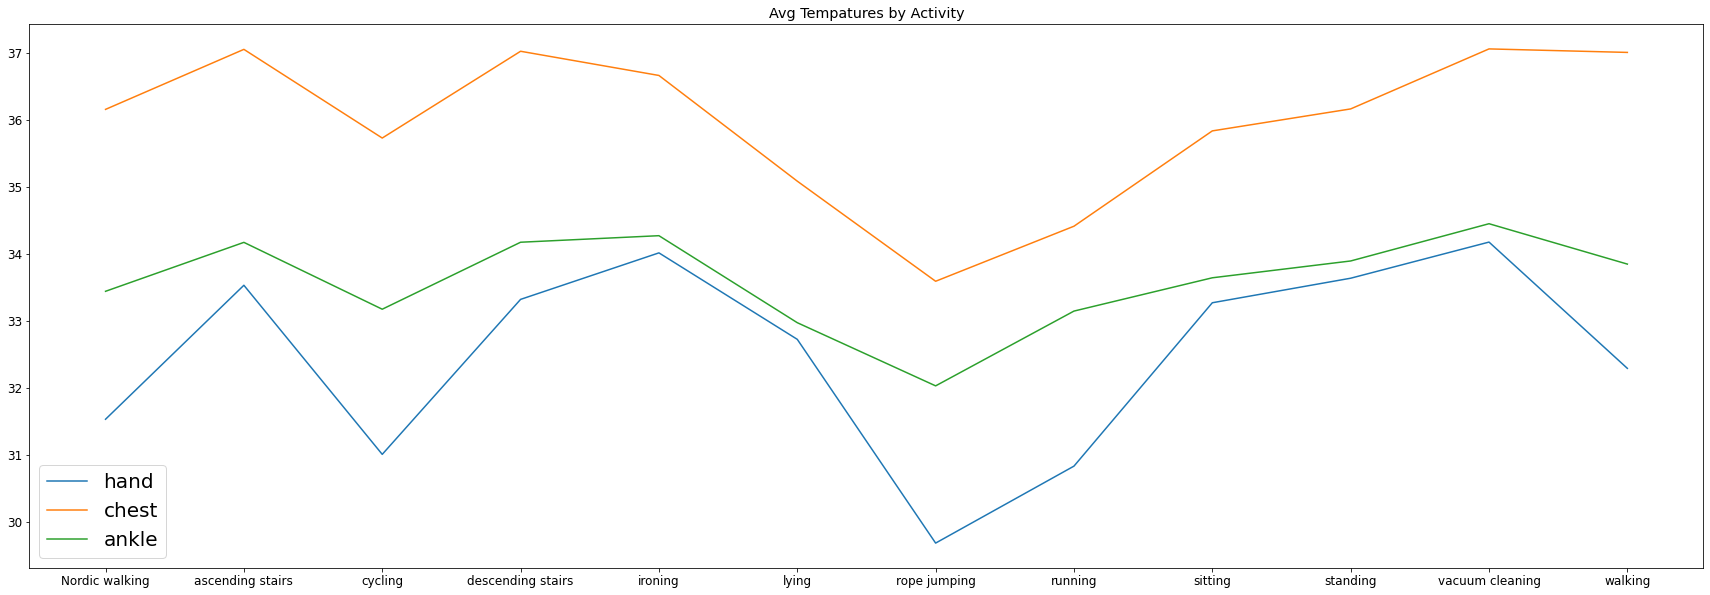

In [107]:
activity_temp = pd.DataFrame()
activity_temp['activity'] = samples['activityID']
activity_temp['hand'] = result_act['hand_temperature']
activity_temp['chest'] = result_act['chest_temperature']
activity_temp['ankle'] = result_act['ankle_temperature']

ax = activity_temp.plot(kind='line', figsize=(30,10), title='Avg Tempatures by Activity')
a = ax.set_xticklabels(activity_temp['activity'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(activity_temp)))

From above graph, it is clear that '**Ironing**' and '**Vaccum cleaning**' will be higher temperature and '**rope jumping**' will have the least.A better understanding of similarity can be obtained from the below box plots.

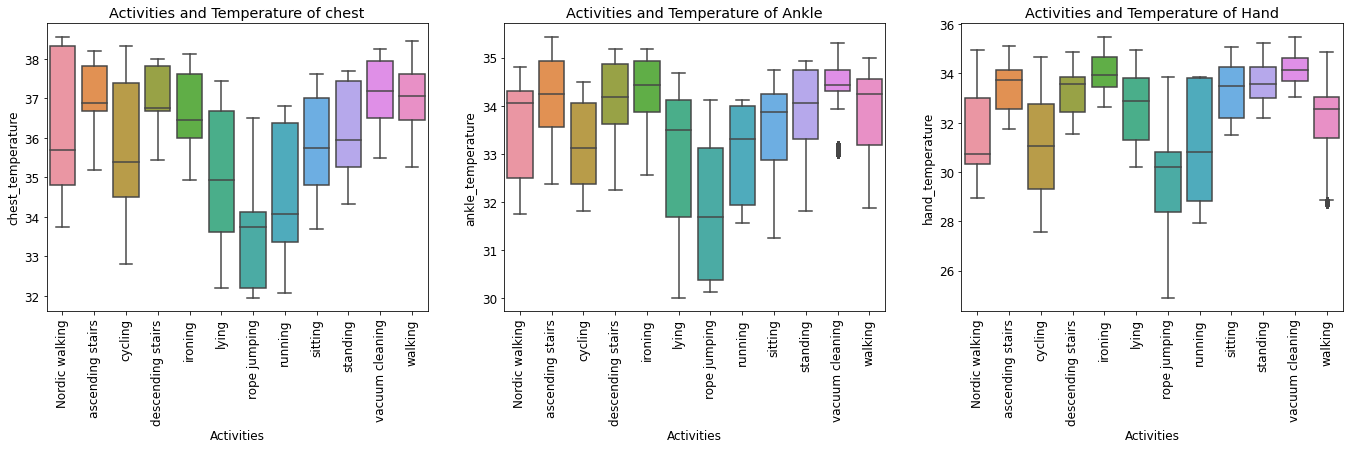

In [108]:
#ploting activityID' and 'chest_temperature'

plt.subplots_adjust(2,1,5,2)
plt.subplot(131)
temp_data=my_training_data[['activityID','chest_temperature']]
temp_data.activityID=temp_data.activityID.astype("category")
plt.xticks(rotation=90)
sns.boxplot(x='activityID',y='chest_temperature',data=temp_data)
plt.ylabel('chest_temperature')
plt.xlabel('Activities')
plt.title('Activities and Temperature of chest')

#ploting activityID' and 'ankle_temperature'
plt.subplot(132)
temp_data=my_training_data[['activityID','ankle_temperature']]
temp_data.activityID=temp_data.activityID.astype("category")
plt.xticks(rotation=90)
sns.boxplot(x='activityID',y='ankle_temperature',data=temp_data)
plt.ylabel('ankle_temperature')
plt.xlabel('Activities')
plt.title('Activities and Temperature of Ankle')

#ploting activityID' and 'hand_temperature'
plt.subplot(133)
temp_data=my_training_data[['activityID','hand_temperature']]
temp_data.activityID=temp_data.activityID.astype("category")
plt.xticks(rotation=90)
sns.boxplot(x='activityID',y='hand_temperature',data=temp_data)
plt.ylabel('hand_temperature')
plt.xlabel('Activities')
plt.title('Activities and Temperature of Hand')

plt.show()

From the above box plots, it is clear that various activities influence **hand, chest and ankle temperatures**.  
Hence, prediction of activity can be based on temperatures and this will be proved in the upcoming Hypothesis Test.

In [109]:
## statistics for various temperature IMU
print('Stats for Chest Temperature IMU\n',my_training_data.chest_temperature.agg(['mean','median','std']))
print('\nStats for Ankle Temperature IMU\n',my_training_data.ankle_temperature.agg(['mean','median','std']))
print('\nStats for Hand Temperature IMU\n',my_training_data.hand_temperature.agg(['mean','median','std']))

Stats for Chest Temperature IMU
 mean      36.179718
median    36.437500
std        1.492742
Name: chest_temperature, dtype: float64

Stats for Ankle Temperature IMU
 mean      33.713788
median    34.062500
std        1.092038
Name: ankle_temperature, dtype: float64

Stats for Hand Temperature IMU
 mean      32.759226
median    33.187500
std        1.791442
Name: hand_temperature, dtype: float64


From the above statistics, it is clear that the measurements with '**chest temperature IMU**' is accurate as the mean value of **36.2°C** is very close to typical human body temperature of **36.5–37 °C**. Before performing the hypothesis testing, possible relations between IMU's like *magnetometer*, *gyroscope* and *accelerometer* is verified by scatter plots.

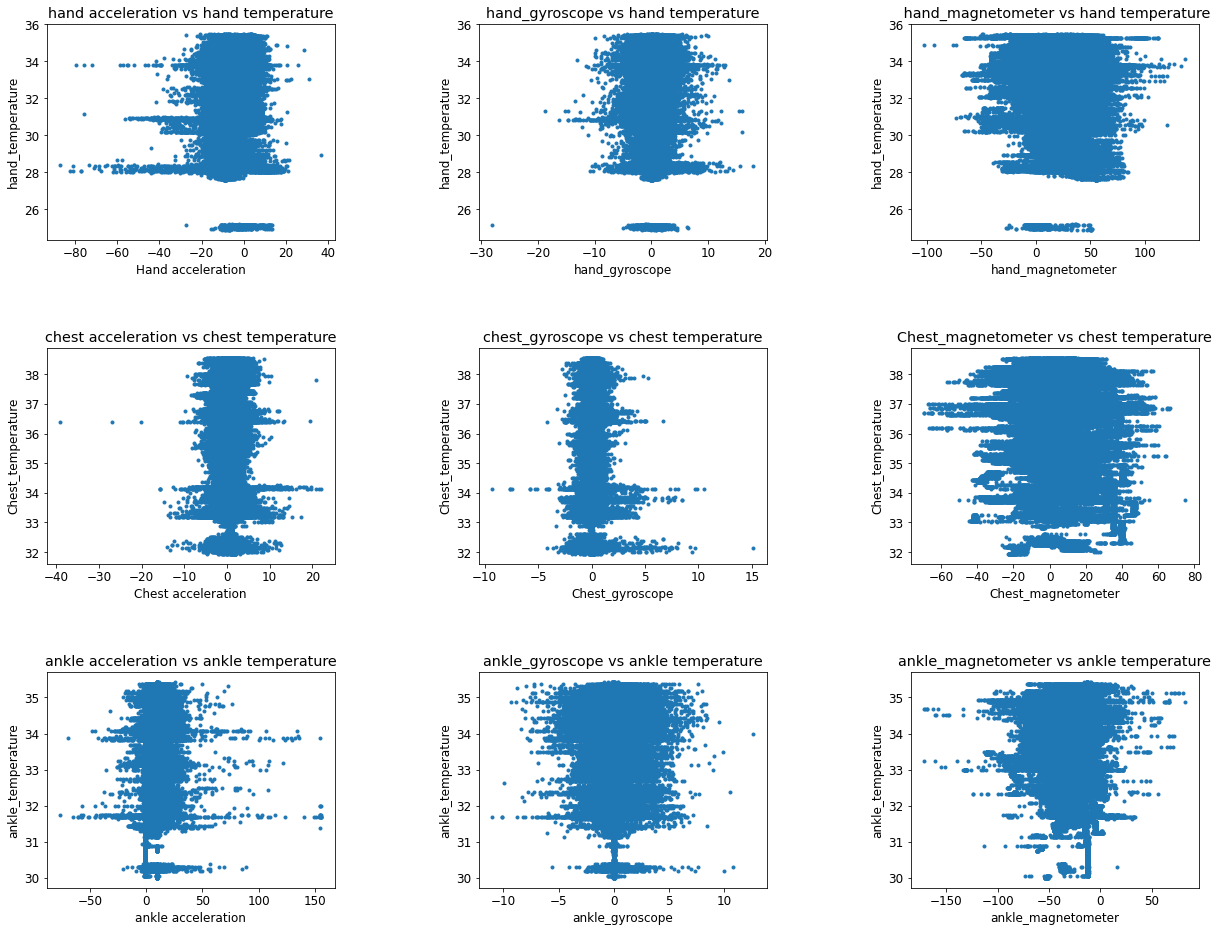

In [110]:
## plotting hand acceleration vs hand temperature
plt.figure(figsize=(8,6))
plt.subplots_adjust(2,3,4,5,.5,.5)
plt.subplot(331)
plt.scatter(my_training_data['hand_acceleration_16g (x)'],my_training_data['hand_temperature'],marker='.')
plt.ylabel('hand_temperature')
plt.xlabel('Hand acceleration')
plt.title('hand acceleration vs hand temperature')

## plotting hand gyro vs hand temperature
plt.subplot(332)
plt.scatter(my_training_data['hand_gyroscope (x)'],my_training_data['hand_temperature'],marker='.')
plt.ylabel('hand_temperature')
plt.xlabel('hand_gyroscope')
plt.title('hand_gyroscope vs hand temperature')

## plotting hand magnetometer vs hand temperature
plt.subplot(333)
plt.scatter(my_training_data['hand_magnetometer (x)'],my_training_data['hand_temperature'],marker='.')
plt.ylabel('hand_temperature')
plt.xlabel('hand_magnetometer')
plt.title(' hand_magnetometer vs hand temperature')

## plotting chest acceleration vs chest temperature
plt.subplot(334)
plt.scatter(my_training_data['chest_acceleration_16g (x)'],my_training_data['chest_temperature'],marker='.')
plt.ylabel('Chest_temperature')
plt.xlabel('Chest acceleration')
plt.title('chest acceleration vs chest temperature')

## plotting chest gyro vs chest temperature
plt.subplot(335)
plt.scatter(my_training_data['chest_gyroscope (x)'],my_training_data['chest_temperature'],marker='.')
plt.ylabel('Chest_temperature')
plt.xlabel('Chest_gyroscope')
plt.title('chest_gyroscope vs chest temperature')

## plotting chest magnetometer vs chest temperature
plt.subplot(336)
plt.scatter(my_training_data['chest_magnetometer (x)'],my_training_data['chest_temperature'],marker='.')
plt.ylabel('Chest_temperature')
plt.xlabel('Chest_magnetometer')
plt.title('Chest_magnetometer vs chest temperature')

## plotting ankle accelerometer vs ankle temperature
plt.subplot(337)
plt.scatter(my_training_data['ankle_acceleration_16g (x)'],my_training_data['ankle_temperature'],marker='.')
plt.ylabel('ankle_temperature')
plt.xlabel('ankle acceleration')
plt.title('ankle acceleration vs ankle temperature')

## plotting ankle gyro vs ankle temperature
plt.subplot(338)
plt.scatter(my_training_data['ankle_gyroscope (x)'],my_training_data['ankle_temperature'],marker='.')
plt.ylabel('ankle_temperature')
plt.xlabel('ankle_gyroscope')
plt.title('ankle_gyroscope vs ankle temperature')

## plotting ankle magnetometer vs ankle temperature
plt.subplot(339)
plt.scatter(my_training_data['ankle_magnetometer (x)'],my_training_data['ankle_temperature'],marker='.')
plt.ylabel('ankle_temperature')
plt.xlabel('ankle_magnetometer')
plt.title('ankle_magnetometer vs ankle temperature')
plt.show()

From above plots, the central tendency is clear, i.e. outliers are minimum for chest IMU. This statement is also supported by the earlier standard deviation calculation.

#### EDA on IMU's

*       **Hand IMU sensor analysis by subjects**

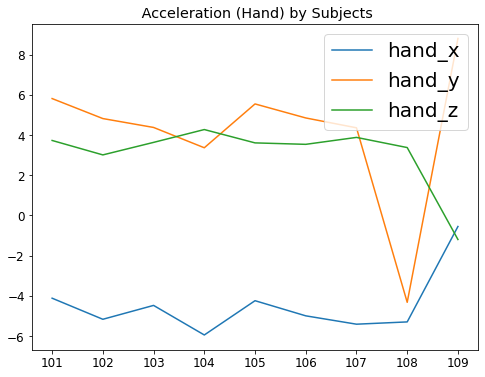

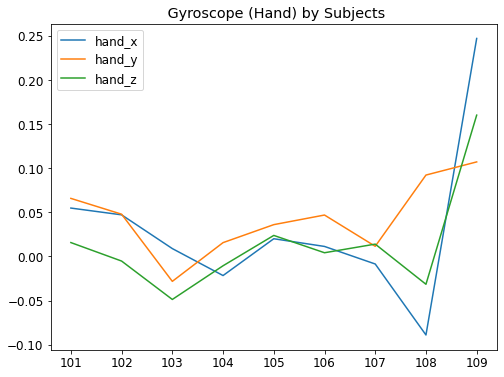

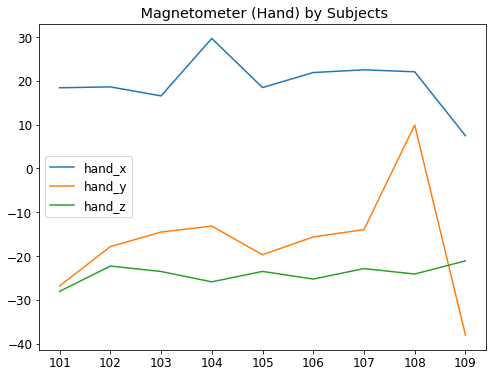

In [111]:
## plotting hand acceleration sensor analysis based on subjects
hand_sensor_data = pd.DataFrame()
hand_sensor_data['hand_x'] = result_id['hand_acceleration_16g (x)']
hand_sensor_data['hand_y'] = result_id['hand_acceleration_16g (y)']
hand_sensor_data['hand_z'] = result_id['hand_acceleration_16g (z)']
ax = hand_sensor_data.plot(kind='line', figsize=(8,6), title=' Acceleration (Hand) by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(hand_sensor_data)))

## plotting hand gyroscope sensor analysis based on subjects
hand_gyro_data = pd.DataFrame()
hand_gyro_data['hand_x'] = result_id['hand_gyroscope (x)']
hand_gyro_data['hand_y'] = result_id['hand_gyroscope (y)']
hand_gyro_data['hand_z'] = result_id['hand_gyroscope (z)']
ax = hand_gyro_data.plot(kind='line', figsize=(8,6), title=' Gyroscope (Hand) by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
c = ax.set_xticks(np.arange(len(hand_sensor_data)))

## plotting hand magnetometer sensor analysis based on subjects
hand_mag_data = pd.DataFrame()
hand_mag_data['hand_x'] = result_id['hand_magnetometer (x)']
hand_mag_data['hand_y'] = result_id['hand_magnetometer (y)']
hand_mag_data['hand_z'] = result_id['hand_magnetometer (z)']
ax = hand_mag_data.plot(kind='line', figsize=(8,6), title=' Magnetometer (Hand) by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
c = ax.set_xticks(np.arange(len(hand_sensor_data)))

From above, all the subjects hand accelerometer sensor are showing similar readings however there is something strange in **subject 8** readings, especially **'y'** reading is off the chart for some reason. 
For Gyroscope, subject3 and subject 8 is showing variations in readings from x and y axis.

This could be due to sensor calibration issue.The challenges in integrity of datacollection is proved here, as many sensors are delivering incorrect readings at particular axis. Hence, there should be a real time sanity check of outputs while recording the data.


**Hand IMU sensor analysis by activity**

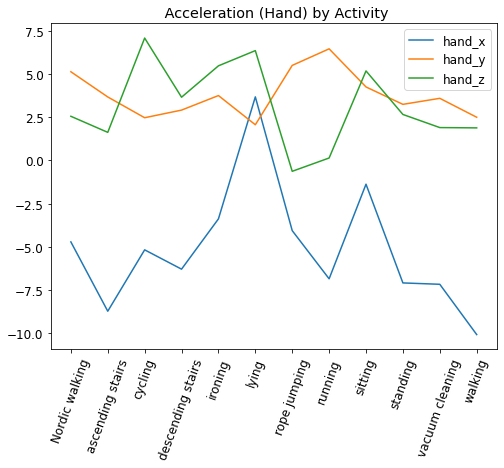

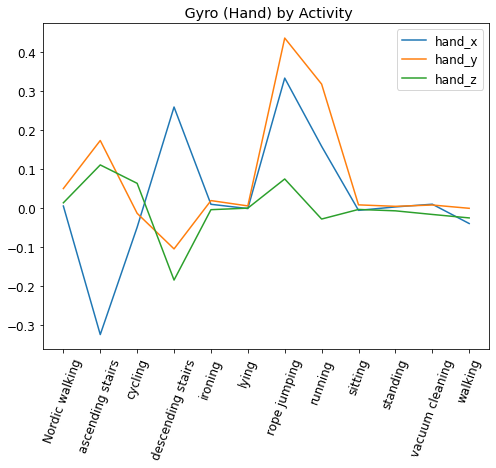

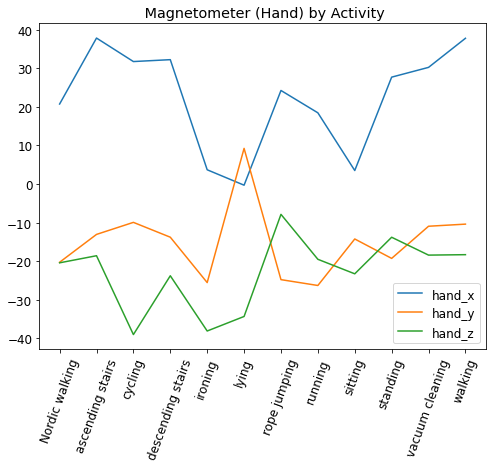

In [112]:
## plotting hand acceleration sensor analysis based on activity

hand_sensor_activity = pd.DataFrame()
hand_sensor_activity['activity'] = samples['activityID']
hand_sensor_activity['hand_x'] = result_act['hand_acceleration_16g (x)']
hand_sensor_activity['hand_y'] = result_act['hand_acceleration_16g (y)']
hand_sensor_activity['hand_z'] = result_act['hand_acceleration_16g (z)']
ax = hand_sensor_activity.plot(kind='line', figsize=(8,6), title=' Acceleration (Hand) by Activity')
a = ax.set_xticklabels(hand_sensor_activity['activity'],rotation=70)
c = ax.set_xticks(np.arange(len(hand_sensor_activity)))

## plotting hand gyroscope sensor analysis based on activity
hand_gyro_activity = pd.DataFrame()
hand_gyro_activity['activity'] = samples['activityID']
hand_gyro_activity['hand_x'] = result_act['hand_gyroscope (x)']
hand_gyro_activity['hand_y'] = result_act['hand_gyroscope (y)']
hand_gyro_activity['hand_z'] = result_act['hand_gyroscope (z)']
ax = hand_gyro_activity.plot(kind='line', figsize=(8,6), title=' Gyro (Hand) by Activity')
a = ax.set_xticklabels(hand_gyro_activity['activity'],rotation=70)
c = ax.set_xticks(np.arange(len(hand_gyro_activity)))

## plotting hand magnetometer sensor analysis based on activity
hand_magn_activity = pd.DataFrame()
hand_magn_activity['activity'] = samples['activityID']
hand_magn_activity['hand_x'] = result_act['hand_magnetometer (x)']
hand_magn_activity['hand_y'] = result_act['hand_magnetometer (y)']
hand_magn_activity['hand_z'] = result_act['hand_magnetometer (z)']
ax = hand_magn_activity.plot(kind='line', figsize=(8,6), title=' Magnetometer (Hand) by Activity')
a = ax.set_xticklabels(hand_magn_activity['activity'],rotation=70)
c = ax.set_xticks(np.arange(len(hand_magn_activity)))
plt.show()


From above IMU data, it is not surprising to see that each activity has got a disctinct reading. From these, IMU's role in predicting an activity is evident. Infact, it can be considered as the most significant feature for activity recognition only after heart rate. The trend will remain same for the chest as well as ankle, which is seen in later stage.

* **chest IMU sensor analysis by subjects**

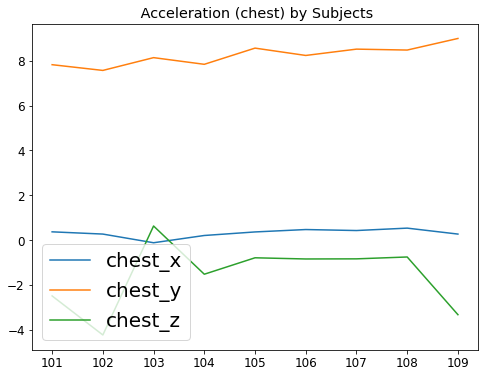

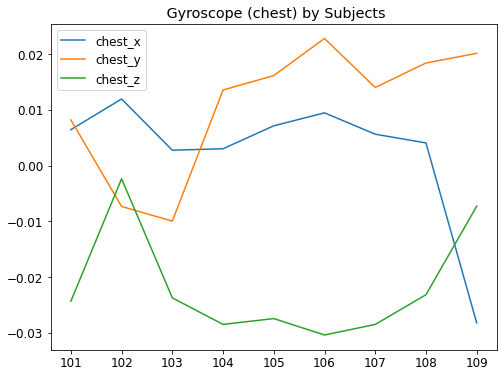

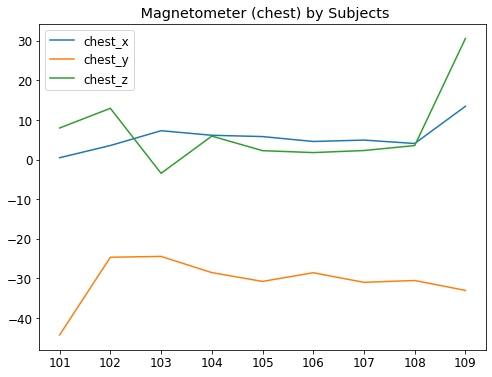

In [113]:
## plotting chest acceleration sensor analysis based on subjects
chest_sensor_data = pd.DataFrame()
chest_sensor_data['chest_x'] = result_id['chest_acceleration_16g (x)']
chest_sensor_data['chest_y'] = result_id['chest_acceleration_16g (y)']
chest_sensor_data['chest_z'] = result_id['chest_acceleration_16g (z)']
ax = chest_sensor_data.plot(kind='line', figsize=(8,6), title=' Acceleration (chest) by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(chest_sensor_data)))

## plotting chest gyroscope sensor analysis based on subjects
chest_gyro_data = pd.DataFrame()
chest_gyro_data['chest_x'] = result_id['chest_gyroscope (x)']
chest_gyro_data['chest_y'] = result_id['chest_gyroscope (y)']
chest_gyro_data['chest_z'] = result_id['chest_gyroscope (z)']
ax = chest_gyro_data.plot(kind='line', figsize=(8,6), title=' Gyroscope (chest) by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
c = ax.set_xticks(np.arange(len(chest_sensor_data)))

## plotting chest magnetometer sensor analysis based on subjects
chest_mag_data = pd.DataFrame()
chest_mag_data['chest_x'] = result_id['chest_magnetometer (x)']
chest_mag_data['chest_y'] = result_id['chest_magnetometer (y)']
chest_mag_data['chest_z'] = result_id['chest_magnetometer (z)']
ax = chest_mag_data.plot(kind='line', figsize=(8,6), title=' Magnetometer (chest) by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
c = ax.set_xticks(np.arange(len(chest_sensor_data)))

There is a slight irregularity in subject3's accelerometer z axis data. In gyroscope, we can see that every individual has got distinct patterns. Magnetometer readings seems to be similar except for subject 3 and 8 z axis reading.

* **chest IMU sensor analysis by activities**

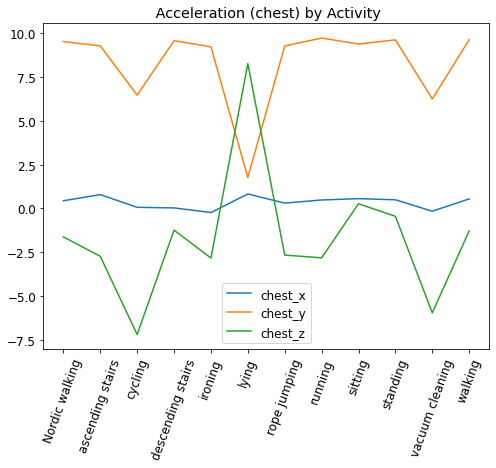

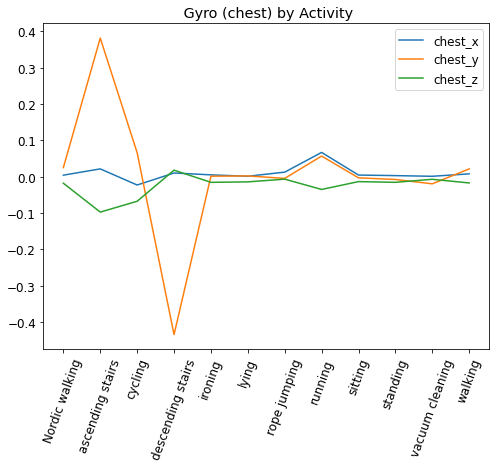

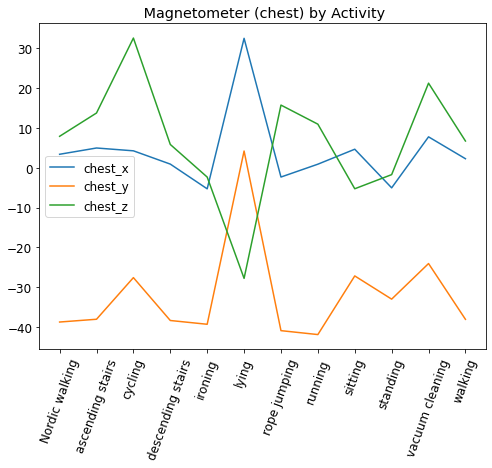

In [114]:
## plotting chest acceleration sensor analysis based on activity

chest_sensor_activity = pd.DataFrame()
chest_sensor_activity['activity'] = samples['activityID']
chest_sensor_activity['chest_x'] = result_act['chest_acceleration_16g (x)']
chest_sensor_activity['chest_y'] = result_act['chest_acceleration_16g (y)']
chest_sensor_activity['chest_z'] = result_act['chest_acceleration_16g (z)']
ax = chest_sensor_activity.plot(kind='line', figsize=(8,6), title=' Acceleration (chest) by Activity')
a = ax.set_xticklabels(chest_sensor_activity['activity'],rotation=70)
c = ax.set_xticks(np.arange(len(chest_sensor_activity)))

## plotting chest gyroscope sensor analysis based on activity
chest_gyro_activity = pd.DataFrame()
chest_gyro_activity['activity'] = samples['activityID']
chest_gyro_activity['chest_x'] = result_act['chest_gyroscope (x)']
chest_gyro_activity['chest_y'] = result_act['chest_gyroscope (y)']
chest_gyro_activity['chest_z'] = result_act['chest_gyroscope (z)']
ax = chest_gyro_activity.plot(kind='line', figsize=(8,6), title=' Gyro (chest) by Activity')
a = ax.set_xticklabels(chest_gyro_activity['activity'],rotation=70)
c = ax.set_xticks(np.arange(len(chest_gyro_activity)))

## plotting chest magnetometer sensor analysis based on activity
chest_magn_activity = pd.DataFrame()
chest_magn_activity['activity'] = samples['activityID']
chest_magn_activity['chest_x'] = result_act['chest_magnetometer (x)']
chest_magn_activity['chest_y'] = result_act['chest_magnetometer (y)']
chest_magn_activity['chest_z'] = result_act['chest_magnetometer (z)']
ax = chest_magn_activity.plot(kind='line', figsize=(8,6), title=' Magnetometer (chest) by Activity')
a = ax.set_xticklabels(chest_magn_activity['activity'],rotation=70)
c = ax.set_xticks(np.arange(len(chest_magn_activity)))
plt.show()


*  **Ankle IMU sensor by activity**

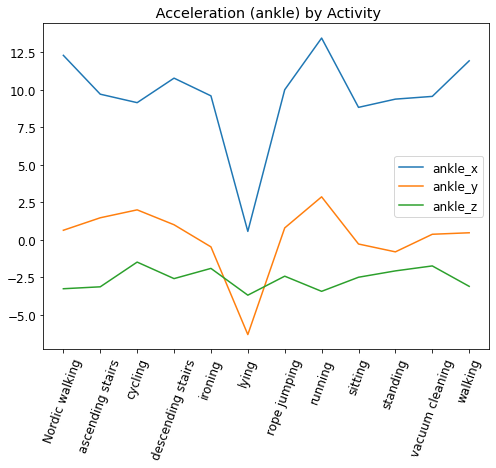

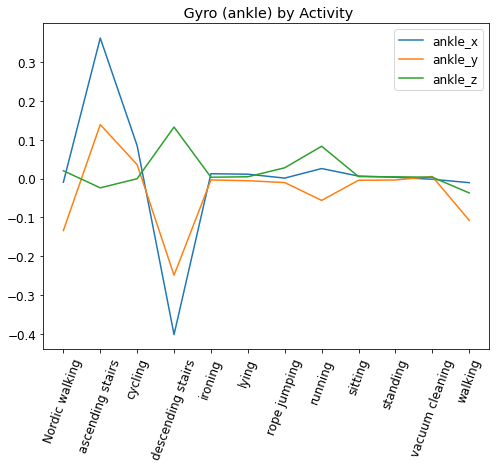

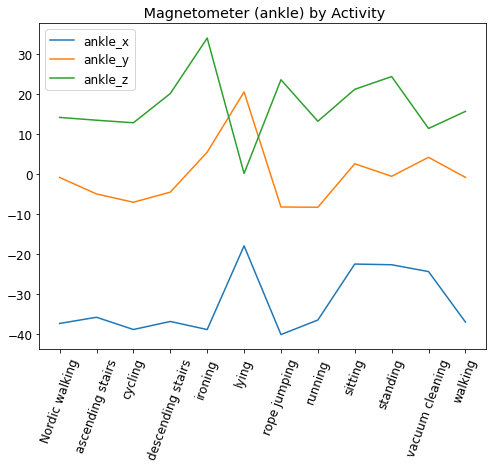

In [115]:
## plotting ankle acceleration sensor analysis based on activity

ankle_sensor_activity = pd.DataFrame()
ankle_sensor_activity['activity'] = samples['activityID']
ankle_sensor_activity['ankle_x'] = result_act['ankle_acceleration_16g (x)']
ankle_sensor_activity['ankle_y'] = result_act['ankle_acceleration_16g (y)']
ankle_sensor_activity['ankle_z'] = result_act['ankle_acceleration_16g (z)']
ax = ankle_sensor_activity.plot(kind='line', figsize=(8,6), title=' Acceleration (ankle) by Activity')
a = ax.set_xticklabels(ankle_sensor_activity['activity'],rotation=70)
c = ax.set_xticks(np.arange(len(ankle_sensor_activity)))

## plotting ankle gyroscope sensor analysis based on activity
ankle_gyro_activity = pd.DataFrame()
ankle_gyro_activity['activity'] = samples['activityID']
ankle_gyro_activity['ankle_x'] = result_act['ankle_gyroscope (x)']
ankle_gyro_activity['ankle_y'] = result_act['ankle_gyroscope (y)']
ankle_gyro_activity['ankle_z'] = result_act['ankle_gyroscope (z)']
ax = ankle_gyro_activity.plot(kind='line', figsize=(8,6), title=' Gyro (ankle) by Activity')
a = ax.set_xticklabels(ankle_gyro_activity['activity'],rotation=70)
c = ax.set_xticks(np.arange(len(ankle_gyro_activity)))

## plotting ankle magnetometer sensor analysis based on activity
ankle_magn_activity = pd.DataFrame()
ankle_magn_activity['activity'] = samples['activityID']
ankle_magn_activity['ankle_x'] = result_act['ankle_magnetometer (x)']
ankle_magn_activity['ankle_y'] = result_act['ankle_magnetometer (y)']
ankle_magn_activity['ankle_z'] = result_act['ankle_magnetometer (z)']
ax = ankle_magn_activity.plot(kind='line', figsize=(8,6), title=' Magnetometer (ankle) by Activity')
a = ax.set_xticklabels(ankle_magn_activity['activity'],rotation=70)
c = ax.set_xticks(np.arange(len(ankle_magn_activity)))
plt.show()


### **Outcomes of EDA:**

From the various observations in this section, we arrive at a conclusion that the dataset is not balanced due to some individuals not performing specific activity. Also, the following insights can be derived from the provide dataset:


*   Heart Rate values were missing in multiple rows, which required dropping to interpret various methods performed during EDA.
*   Heart rate is the best feature which could be used to predict the activity being performed by the individual.
*   Chest temperature IMU readings seems to be more accurate among the various tempertature IMU's being used.
*   Accelerometer is another feature which can be used to predict the activity after hear rate. All the IMU's readings from accelerometer,gyroscope and magnetomer are proving to be significant for activity recognition. 
*   Model which consider all the above features would be most accurate in predicting physical activity being performed. 



*  ****

## Part II : Hypothesis Testing

The mean calculated from a sample, x̄ is an estimate of a population mean, μ. For the hypothesis test, samples of size n from a population X is taken. Since the value of n is large enough (n>30), the central limit theorem holds good and thus the sampling distribution is approximated to be normal. The p-value is a number describing how likely  the data would have occurred by random chance. 
A p-value ≤ 0.05 is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct. So we reject the null hypothesis, and choose the alternative hypothesis.
In case the p-value > 0.05, it is considered to be statistically insignificant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis.

Multiple hypothesis is performed on the training data to prove various hypothesis. I have shortlisted the below parameters for the hypothesis testing :    

*   Hypothesis Testing based on Heart Rate
*   Hypothesis Testing based on Temperaure



**Hypothesis Testing based on Heart Rate**

From above experiments, it is understood that the heart rates of various activities will be a deciding factor in activity recognition and we try to prove the same by performing two Hypothesis. For this, training dataset is categorized as **vigorous** , **light** and **moderate**.    

**" If heart rate is related to intensity of physical activity, then subjects performing moderate activities would have higher heart rates than light activities"**

Tests will be conducted on mean heart rate of subjects performing moderate activities and the mean heart rate of subjects performing light activities. 

***Null Hypothesis:***
h0 : Heart rate of subjects performing moderate activities will be equal to the Heart rate of subjects performing light activities. (μ1 - μ2 = 0)

***Alternate Hypothesis:***
h1 : Heart rate of subjects performing moderate activities will higher than the heart rate of subjects performing light activities.(μ1 - μ2 > 0)

In [116]:
## Light activities statistics
light_act = my_testing_data.loc[(my_testing_data["activity_level"] == 'light')]
light_act_mean = light_act['heart_rate'].mean()
light_act_stdev = light_act['heart_rate'].std()
light_act_count = light_act['heart_rate'].count()

print("Mean : Heart rate of individuals performing light activities =  {} ".format(light_act_mean))
print("Standard deviaion : Heart rate of individuals performing light activities =  {} ".format(light_act_stdev))
print("Count : Heart rate of individuals performing light activities =  {} ".format(light_act_count))

Mean : Heart rate of individuals performing light activities =  83.90076076620025 
Standard deviaion : Heart rate of individuals performing light activities =  11.060756344862344 
Count : Heart rate of individuals performing light activities =  14722 


In [117]:
## Moderate activities statistics
moderate_act=my_testing_data.loc[(my_testing_data["activity_level"] == 'moderate')]
moderate_act_mean = moderate_act['heart_rate'].mean()
moderate_act_stdev = moderate_act['heart_rate'].std()
moderate_act_count = moderate_act['heart_rate'].count()

print("Mean : Heart rate of individuals performing moderate activities =  {} ".format(moderate_act_mean))
print("Standard deviaion : Heart rate of individuals performing moderate activities =  {} ".format(moderate_act_stdev))
print("Count : Heart rate of individuals performing moderate activities =  {} ".format(moderate_act_count))


Mean : Heart rate of individuals performing moderate activities =  117.60879851652919 
Standard deviaion : Heart rate of individuals performing moderate activities =  15.713016146226286 
Count : Heart rate of individuals performing moderate activities =  15639 


**Difference between means :**
D ~ N (μ1 - μ2 , $σ1^2$ / n1 + $σ2^2$ / n2)

If two (or more) random variables are normally distributed, then their sum and difference of those variables will also be normally distributed.

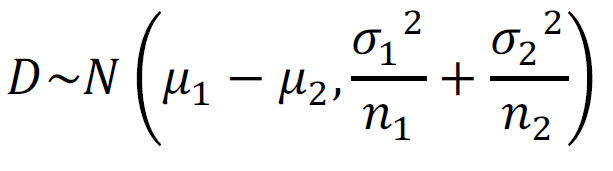

In [118]:
## calculationg z-score for 1st hypothesis
mean_diff=moderate_act_mean-light_act_mean
sig_moderate = (moderate_act_stdev**2)/moderate_act_count
sig_light = (light_act_stdev**2)/light_act_count

print ("Mean difference = {}".format(mean_diff))
## (  σ12  / n1 +  σ22  / n2)


den=np.sqrt(sig_moderate+sig_light)

Z1=mean_diff/den
print("Value of Z = {}".format(Z1))

Mean difference = 33.70803775032894
Value of Z = 217.1441943444517


Both samples are of a sufficient size to assume a normal distribution, hence we use it to calculate the p-value. 


P(D ≥ 33.70803775032894) = P( Z ≥ 33.70803775032894 / √( $σ1^2$ / n1 + $σ2^2$ / n2) )

P(D ≥ 33.70803775032894) = P( Z ≥ 217.1441943444517 )

In [119]:
## conductiong z-test to p-value
pValue = stats.norm.sf(Z1)

if pValue > 0.05:
    print("The p-value is ", pValue, " and We fail to reject h0")
else:
    print("The p-value is ", pValue, " and We are rejecting h0.")

The p-value is  0.0  and We are rejecting h0.


Z-Test is conducted above to obtain the probability value (p-value) with a condifence interval of 95%.

The p-value remains '0' from the above z-test. So, there is a strong evidence to reject the null hypothesis. Thus,we reject the null hypothesis statement and conclude with good confidence that "the heart rate of moderate activities will be higher than light activities".

Now, the second hypothesis is conducted to prove that heart rate of subjects performing vigorous activity is higher than subjects performing moderate activities.

**" If heart rate is related to intensity of physical activity, then subjects performing vigorous activities would have higher heart rates than moderate activities"**

Tests will be conducted on mean heart rate of subjects performing moderate activities and the mean heart rate of subjects performing vigorous activities. 

***Null Hypothesis:***
h0 : Heart rate of subjects performing vigorous activities will be equal to the Heart rate of subjects performing moderate activities. (μ1 - μ2 = 0)

***Alternate Hypothesis:***
h1 : Heart rate of subjects performing vigorous activities will higher than the heart rate of subjects performing moderate activities.(μ1 - μ2 > 0)

In [120]:
## Vigorous activities statistics
vigorous_act= my_testing_data.loc[(my_testing_data["activity_level"] == 'vigorous')]
vigorous_act_mean = vigorous_act['heart_rate'].mean()
vigorous_act_stdev = vigorous_act['heart_rate'].std()
vigorous_act_count = vigorous_act['heart_rate'].count()

print("Mean : Heart rate of individuals performing vigorous activities =  {} ".format(vigorous_act_mean))
print("Standard deviaion : Heart rate of individuals performing vigorous activities =  {} ".format(vigorous_act_stdev))
print("Count : Heart rate of individuals performing vigorous activities =  {} ".format(vigorous_act_count))


Mean : Heart rate of individuals performing vigorous activities =  145.08461700780757 
Standard deviaion : Heart rate of individuals performing vigorous activities =  26.03455454804163 
Count : Heart rate of individuals performing vigorous activities =  4739 


**Difference between means :**
D ~ N (μ1 - μ2 , $σ1^2$ / n1 + $σ2^2$ / n2)

In [121]:
## calculating z-score for 2nd hypothesis
mean_diff= vigorous_act_mean-moderate_act_mean
sig_vigorous = (vigorous_act_stdev**2)/vigorous_act_count

print ("Mean difference = {}".format(mean_diff))
## (  σ12  / n1 +  σ22  / n2)

den=np.sqrt(sig_moderate+sig_vigorous)
Z2=mean_diff/den
print("Value of Z = {}".format(Z2))

Mean difference = 27.475818491278375
Value of Z = 68.94578499677506


In [122]:
## conductiong z-test to p-value
pValue = stats.norm.sf(Z2)

if pValue > 0.05:
    print("The p-value is ", pValue, " and We fail to reject h0")
else:
    print("The p-value is ", pValue, " and We are rejecting h0.")

The p-value is  0.0  and We are rejecting h0.



The p-value remains '0' from the above z-test and  there is a strong evidence to reject the null hypothesis. Thus,we go with alternate hypothesis statement as the p-value is less than significance value and can be concluded with good confidence that "the heart rate of vigorous activities will be higher than moderate activities".

*From above 2 hypothesis, we conclude that individuals performing vigorous activity will have the highest heart rate.*

*  ****

**Hypothesis Testing based on Heart rate & Temperaure**


**"" If heart rate is related to Chest temperature, then heart rate could  increase with chest temperature”.**

Here, tests are conducted on heart rates and chest temperature for all the subjects. 

***Null Hypothesis:***
h0 :  there is no relation between heart rate of subjects and their chest temperature.

***Alternate Hypothesis:***
h1 : There is relation between heart rate of subjects and their chest temperature

We assume the null hypothesis is true, and to compute the probability value by using Pearson's correlation.

In [123]:
#Calculating correlation using pearsons
df_chesttemp=my_testing_data['chest_temperature']
df_heart=my_testing_data['heart_rate']

pearsoncc=stats.pearsonr(np.array(df_chesttemp),np.array(df_heart))
print("Pearson's correlation coefficient is {}".format(pearsoncc))

Pearson's correlation coefficient is (-0.11655850190117642, 2.0329881307110941e-106)


Obtained Pearson's correlation coefficient **(r) = -0.116** and p-value(probablility value) = **2.0329881307110941e-106**. Calculated p-value is very small and the correlation coefficienct is negative.Hence, this test can be considered significant and we reject the null hypothesis H0, meaning that there is a negative correlation between Chest temperature and Heart rate of subjects. So,as the heart rate increase, the chest temperature will be decreasing. Various factors like sweating during the excessive workout could be lowering the body temperature.


*  ****

## Part III : Modelling

Before modelling, PCA and clustering is performed to provide a better understanding of any underlying relations between given feature set.

Algorithms which use set of unlabelled dataset comes under unsupervised learing and, the underlying relationships are unknown since the data is unlabelled. Whereas in supervised learning, training data uses the known labels to produce an inferred function, which can be used for predicting new labes of data.
Selection of best feature (or features) is important for optimum performance of the model being developed. Pertaining to provided dataset, all the IMU parameters should be considered for the models performance. The same can be seen in various EDA performed in section 1.
After splitting the dataset, first set is used for model training and performance of developed model is tested by using the second set (by observing how well it predicts testing set parameters).Various parameters like Precision, Accuracy, Recall and F1 Score is used to compare performance of developed model. An ideal model should have high Accuracy, meaning that the model is predicting inputs correctly (i.e. the number of false positives and negatives should be lowest).

### **Principal Component Analysis**

For PCA, inputs from the training dataset, which is 80% of the total sample data is used. The major challenge in the provided dataset is the number of features. It is challenging to interpret how each feature is contributing to the model as each feature can be represented as a dimension. It is very difficult to interpret hugher dimensions, hence we need to reduce the dimensionality. This is the reason to perform the PCA i.e. for dimensionality reduction. PCA will extract the principal components as per the variance level, so that it becomes easy for the clustering algoritm in later stage.

In [ ]:
train_model_df=my_training_data

In [ ]:
test_model_df=my_testing_data

Some irrelevant columns needs to be dropped before doing the PCA. Here, "timestamp " and "subject_id" is not relevant and is dropped for the model creation.

In [ ]:
train_model_df = train_model_df.drop(["timestamp", "subject_id"],1)
train_model_df

,activityID,heart_rate,hand_temperature,hand_acceleration_16g (x),hand_acceleration_16g (y),hand_acceleration_16g (z),hand_gyroscope (x),hand_gyroscope (y),hand_gyroscope (z),hand_magnetometer (x),hand_magnetometer (y),hand_magnetometer (z),chest_temperature,chest_acceleration_16g (x),chest_acceleration_16g (y),chest_acceleration_16g (z),chest_acceleration_6g (x),chest_acceleration_6g (y),chest_acceleration_6g (z),chest_gyroscope (x),chest_gyroscope (y),chest_gyroscope (z),chest_magnetometer (x),chest_magnetometer (y),chest_magnetometer (z),ankle_temperature,ankle_acceleration_16g (x),ankle_acceleration_16g (y),ankle_acceleration_16g (z),ankle_gyroscope (x),ankle_gyroscope (y),ankle_gyroscope (z),ankle_magnetometer (x),ankle_magnetometer (y),ankle_magnetometer (z),activity_level
119017,vacuum cleaning,116.0,34.0000,-10.358300,1.12453,0.650888,0.363588,0.636643,0.785932,24.788200,-1.44246,-16.67240,36.7500,2.881410,8.816460,-1.095790,2.638700,8.465620,-0.524933,0.292632,1.145210,0.225629,13.47790,-22.63520,1.76471,35.1875,9.711620,0.604629,-2.621610,0.601406,-0.012815,-0.302963,-10.1949,16.958400,-1.48390,moderate
20674,running,171.0,30.6250,-2.627850,38.85840,-3.132380,0.197788,2.901680,4.234370,-1.751170,-65.25720,-2.11783,33.8125,3.435960,28.679900,-3.512280,3.324860,25.188700,-1.613950,0.040125,0.455180,-0.536531,-21.31140,-60.56050,-10.12940,33.1250,-7.556810,18.928200,-1.523190,-0.158074,-0.941105,-5.888490,-55.6638,11.570500,36.29810,vigorous
1052,lying,86.0,31.2500,1.309530,9.67674,-0.126886,-0.195747,0.125737,0.182229,-43.794900,-12.01660,-17.72740,33.0625,8.732270,1.707900,2.905410,8.560930,1.760670,3.349120,0.002754,-0.385874,0.146569,-23.85620,3.29041,-54.70010,31.6250,0.200547,-0.866683,-10.466500,-0.046655,0.351168,0.149331,-28.9118,31.512900,25.27570,light
111406,sitting,80.0,33.5000,-4.386310,1.48799,8.321130,0.046515,0.000435,-0.086043,15.156300,-7.51378,-28.95190,35.8750,1.196150,8.186250,5.109800,0.988093,8.249800,5.423650,0.133462,-0.143224,-0.082786,3.38364,-18.50550,-14.54450,34.7500,9.630960,-1.142420,-2.495820,-0.017558,-0.161741,0.013045,-18.4527,-2.420030,10.84890,light
98999,walking,114.0,34.6250,-10.658200,4.63127,2.174060,-1.243790,0.453831,0.885213,43.849900,-22.43040,-3.19807,38.2500,3.857810,12.225700,-3.180110,4.116520,11.620500,-3.260070,0.342988,0.319638,-0.152545,-10.01690,-37.74580,-11.70840,34.1250,10.960200,6.362160,-1.911330,-1.233980,-0.704592,-1.803110,-36.9321,26.472200,21.95510,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46641,lying,76.0,31.1250,8.499780,-1.71829,4.791690,0.036721,0.018704,0.005499,-0.713344,15.92110,-40.60250,33.3125,1.351190,-0.329576,9.864250,1.140580,-0.253942,9.765570,0.007631,0.012309,-0.048985,31.51550,8.12284,-27.74430,31.3750,0.510367,-9.920660,0.783822,0.035946,-0.006971,0.000458,-15.7787,18.810000,-8.88257,light
7423,ironing,94.0,33.3125,3.888190,3.89399,4.626710,-2.243960,-1.010030,2.254600,-55.587100,-42.41920,-3.56968,35.1250,1.769010,9.316260,-0.110819,1.655550,9.251600,0.254026,0.350465,0.246335,-0.103169,-17.74100,-49.58590,-25.75030,33.8750,9.639890,0.147874,-2.426560,0.103900,0.012613,0.007123,-54.5530,-7.074020,58.49410,light
38570,walking,123.0,31.2500,-13.071200,2.65388,3.799550,0.814009,0.767846,-4.391340,16.515400,-39.63370,-20.79890,36.1875,-0.502298,8.417650,-5.995910,-1.032530,8.738090,-6.018080,-0.593620,-0.616315,0.927024,5.48113,-39.37340,-5.40400,34.3750,1.177370,-10.129800,-2.025080,-1.454570,-0.999340,1.424060,-41.6102,-4.834270,12.73780,moderate
48932,sitting,77.0,31.7500,0.008701,5.16850,7.951190,-0.020099,-0.007783,-0.038713,0.681835,-16.46060,-25.11270,34.6250,-0.000246,9.344380,3.187040,-0.084671,9.250950,3.559070,0.021660,0.018205,-0.019752,4.51934,-18.08010,-8.69944,32.5625,9.047200,-3.967660,-0.130314,0.009794,0.027311,0.003074,-22.7192,-0.771383,13.86440,light


In [ ]:
## Train dataset
X_train = train_model_df.drop(['activityID','activity_level'], axis=1)
y_train = train_model_df['activityID'].values

# Test Dataset
X_test = test_model_df.drop(['activityID','activity_level'], axis=1)
y_test = test_model_df['activityID'].values

Our goal is to predict the activityID and only the features which are to be considered to predict the activityID must be present in the training dataset (X_train). This is achieved by dropping the activityID data before passing it over to the PCA algorithm. If the model already knows what the activities are, then it would be resulting in class inbalance or bias.The tags to be predicted are stored and passed to a variable(y_train).

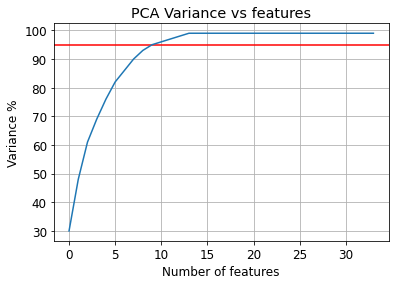

In [ ]:
## PCA on provided dataset
pca_pamap2 = PCA()
pca_pamap2.fit(X_train)

feature_var=np.cumsum(np.round(pca_pamap2.explained_variance_ratio_,2)*100)

plt.title("PCA Variance vs features")
plt.ylabel("Variance %")
plt.xlabel("Number of features")
l = plt.axhline(95, color="red")

plt.plot(feature_var)
plt.grid()

Usually 90% of variance explains most relevant features out of the dataset and by plotting  variance ratio aginst the number of features,we can find the important components. From the graph above, around 8 components fall around to required level of the variance for analysis.

In [ ]:
## variance expalied for each principal component
My_pca = PCA(n_components=8)
X_train=My_pca.fit_transform(X_train)
print('Explained variation per principal component: {}'.format(My_pca.explained_variance_ratio_))

Explained variation per principal component: [0.30016784 0.18108406 0.12505156 0.07997004 0.07190191 0.06311139
 0.04441721 0.03922649]


Looking at the above readings, the significance of each principal componenets are understood. It is evident that most of the features are captured in the 1st principal component and the significance of rest components are following.

**Clustering**

Cluster analysis is an unsupervised machine learning task. It automatically discovers natural grouping in data and clusters them based on correlation. Unlike supervised learning , clustering algorithms only interpret the input data and find natural groups or clusters in feature space. Inorder to test this algorithm, labelled data in our dataset (activityID) is dropped.

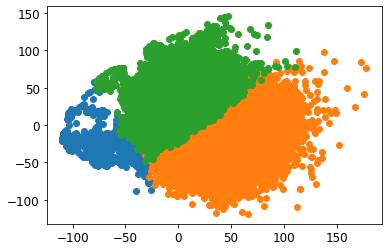

In [ ]:
from sklearn import cluster
from collections import defaultdict

K=3 # specify number of clusters

cluster_K3=cluster.KMeans(init='random',n_clusters=K)
cluster_K3.fit(X_train)  

cluster_K3.predict(X_train)

#In order to plot the clusters we need the co-ordinates of the points to be put in appropriate lists. One way is:

def divide(data,labels):
    xclusters=defaultdict(list)
    yclusters=defaultdict(list)
    for datapoint,label in zip(data,labels):
        x=datapoint[0]
        y=datapoint[1]
        xclusters[label].append(x)
        yclusters[label].append(y)
    return xclusters,yclusters    

clusters=divide(X_train,cluster_K3.predict(X_train)) # apply the function that makes the data point lists to the predicted clusters

#plot a 2d scatter plots of the generated clusters 
plt.scatter(clusters[0][0],clusters[1][0])
plt.scatter(clusters[0][1],clusters[1][1])
plt.scatter(clusters[0][2],clusters[1][2])


Dataset transformed after the PCA is used in the above clustering. K-clustering algorithm is used above with number of clusters as 3. Above cluster seems to hold good for the model creation. There appears to be overlapping of the various clusters, which may hinder the performace of the model.

In [ ]:
score= silhouette_score(X_train, cluster_K3.labels_)

print('Silhouette Score = ', score)

Silhouette Score =  0.2098942583912616


Silhouette Score for the model is about 0.21, which is fair. To improve the score, the number of features being passed to the model needs to be revisited. Also, the training dataset can be further cleansed, so that any outliers would be minimal. Further, models are created by using various library functions.

**Clustering with limited features**

In [136]:
## relevant features are extracted
cluster_df=my_training_data[["chest_temperature","heart_rate","hand_acceleration_16g (x)","hand_acceleration_16g (y)","hand_acceleration_16g (z)","hand_gyroscope (x)","hand_gyroscope (y)","hand_gyroscope (z)"]]
cluster_df

,chest_temperature,heart_rate,hand_acceleration_16g (x),hand_acceleration_16g (y),hand_acceleration_16g (z),hand_gyroscope (x),hand_gyroscope (y),hand_gyroscope (z)
119017,36.7500,116.0,-10.358300,1.12453,0.650888,0.363588,0.636643,0.785932
20674,33.8125,171.0,-2.627850,38.85840,-3.132380,0.197788,2.901680,4.234370
1052,33.0625,86.0,1.309530,9.67674,-0.126886,-0.195747,0.125737,0.182229
111406,35.8750,80.0,-4.386310,1.48799,8.321130,0.046515,0.000435,-0.086043
98999,38.2500,114.0,-10.658200,4.63127,2.174060,-1.243790,0.453831,0.885213
...,...,...,...,...,...,...,...,...
46641,33.3125,76.0,8.499780,-1.71829,4.791690,0.036721,0.018704,0.005499
7423,35.1250,94.0,3.888190,3.89399,4.626710,-2.243960,-1.010030,2.254600
38570,36.1875,123.0,-13.071200,2.65388,3.799550,0.814009,0.767846,-4.391340
48932,34.6250,77.0,0.008701,5.16850,7.951190,-0.020099,-0.007783,-0.038713


Based on the above EDA, we have already proven the relationship between the **chest temperature,heart rate, gyroscope and accelerometer**. Hence, we are doing another cluster considering the above features alone to find the Silhouette score.

In [137]:
## converting the dataset to numpy array
short_df = cluster_df.astype(np.float32)
X=short_df.to_numpy()

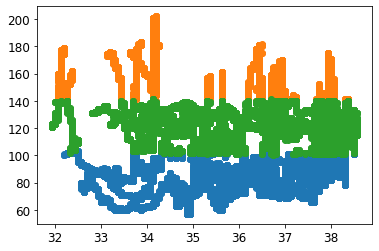

In [135]:
from sklearn import cluster
from collections import defaultdict

K=3 # specify number of clusters

cl_K3=cluster.KMeans(init='random',n_clusters=K)
cl_K3.fit(X)  

cl_K3.predict(X)

#In order to plot the clusters we need the co-ordinates of the points to be put in appropriate lists. One way is:

def divide(data,labels):
    xclusters=defaultdict(list)
    yclusters=defaultdict(list)
    for datapoint,label in zip(data,labels):
        x=datapoint[0]
        y=datapoint[1]
        xclusters[label].append(x)
        yclusters[label].append(y)
    return xclusters,yclusters    


clusters=divide(X,cl_K3.predict(X)) # apply the function that makes the data point lists to the predicted clusters

#plot a 2d scatter plots of the generated clusters - remember the data is 3d! (plot 3d if you want...)
plt.scatter(clusters[0][0],clusters[1][0])
plt.scatter(clusters[0][1],clusters[1][1])
plt.scatter(clusters[0][2],clusters[1][2])


In [138]:
## Calculating Silhouette score
from sklearn.metrics.cluster import silhouette_score 
SC_3=silhouette_score(X,cl_K3.predict(X))
print('Silhouette Score = ', SC_3)

Silhouette Score =  0.480303


New Silhouette score is 0.48, which is much better than the earlier score of 0.2 (considering all the features). Hence, the earlier hypothesis and the above clustering paves way for the best model. This cluster can be used with the labelled data for predicting the activity performed by the subject.

**Modelling**

In this section,We are going to focus on three modelling algorithms,Logistic-regression and RandomForest. These are best suited for most supervised learning modelling.

In [ ]:
## confusion matrix to evaluate the performance of model
def my_confusion_matrix (predict_activity, real_activity, title):
 
    #Accuracy, precision, recall and f-score are calculated using sklearn library
    precision = precision_score(real_activity, predict_activity, average='macro')
    recall = recall_score(real_activity, predict_activity, average='macro')
    accuracy = accuracy_score(real_activity, predict_activity)
    fscore = f1_score(real_activity, predict_activity, average='macro')
    
    #Display results
    print((title))
    print(('Accuracy: ' + str(accuracy)))
    print(('Precision: ' + str(precision)))
    print(('Recall: ' + str(recall)))
    print(('F-score: ' + str(fscore)))    

Above Function is used to display confusion matrix for predicted and real activity. sklearn library is used to calculate accuracy, precision, recall and F-scores.  Macro type calculates values separated by class and not using weights for the aggregation,which leads to bigger penalisation as model does not perform well with the minority classes.This is exactly what we want as there is imbalance in the dataset.

In [ ]:
features_df=my_training_data
features_df=features_df.drop(['activityID','activity_level'],axis=1)

In [ ]:
## extracting the features list from dataframe
features=np.array(features_df.columns)
features

array(['timestamp', 'heart_rate', 'hand_temperature',
       'hand_acceleration_16g (x)', 'hand_acceleration_16g (y)',
       'hand_acceleration_16g (z)', 'hand_gyroscope (x)',
       'hand_gyroscope (y)', 'hand_gyroscope (z)',
       'hand_magnetometer (x)', 'hand_magnetometer (y)',
       'hand_magnetometer (z)', 'chest_temperature',
       'chest_acceleration_16g (x)', 'chest_acceleration_16g (y)',
       'chest_acceleration_16g (z)', 'chest_acceleration_6g (x)',
       'chest_acceleration_6g (y)', 'chest_acceleration_6g (z)',
       'chest_gyroscope (x)', 'chest_gyroscope (y)',
       'chest_gyroscope (z)', 'chest_magnetometer (x)',
       'chest_magnetometer (y)', 'chest_magnetometer (z)',
       'ankle_temperature', 'ankle_acceleration_16g (x)',
       'ankle_acceleration_16g (y)', 'ankle_acceleration_16g (z)',
       'ankle_gyroscope (x)', 'ankle_gyroscope (y)',
       'ankle_gyroscope (z)', 'ankle_magnetometer (x)',
       'ankle_magnetometer (y)', 'ankle_magnetometer (z)', 'su

In [ ]:
#features_used for training the model
train_data = np.array(my_training_data.loc[:, features])
train_activity = np.array(my_training_data.loc[:, 'activityID'])

#features used while testing the model
test_data = np.array(my_testing_data.loc[:, features])
real_activity = np.array(my_testing_data.loc[:, 'activityID'])


In [ ]:
## fitting the model using Logistic Regression algorithm
log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X=train_data, y=train_activity )

## predicting the model using Logistic Regression algorithm
y_pred_lr = log_reg.predict(test_data)
my_confusion_matrix(y_pred_lr, real_activity,"Confusion Matrix using all features")

Confusion Matrix using all features
Accuracy: 0.8451566951566951
Precision: 0.8091938732754898
Recall: 0.7895192669526202
F-score: 0.7964216700031211


Interpreting the above results, the performance of our model using LogisticRegression is around 85%. During EDA, we have seen the undelying outliers in the dataset. These outliers acts like nosie, hindering the accuracy of the model. Also, during the PCA, the number of principal components was around 8 and if we were to only give these components to our model, it would have the best accuracy (more than 95%).
Nonetheless, the model looks to be okay as we are able to get around 85% accuracy.(The goldstandard will be 95% accuracy).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
## fitting the model using RadomForestClassifier
rf_clf = RandomForestClassifier(criterion='entropy')   
rf_clf.fit(train_data, train_activity)

## predicting the model using RFC
y_predict = rf_clf.predict(test_data)
my_confusion_matrix(y_predict, real_activity, "Confusion Matrix using all features ")


Confusion Matrix using all features 
Accuracy: 0.9993447293447294
Precision: 0.9992295842125437
Recall: 0.9992365142207612
F-score: 0.9992329507609575


Random Forest algorithm is widely used for classification as well as regression, which makes it versatile. Random Forest is a forest of trees, specifically decision trees which are randomly populating the forest. This algorithm combines various decision trees together ( more trees in the forest, the better the accuracy of its predictions).Random Forest gives good performance especially for high dimensionality datasets, as is the case for the provided dataset.

### **Conclusion**

Earlier in the introduction, the need for activity monitoring devices was discussed and in this report, we have analysed physical activity and their corelation with various IMU's. During EDA, dataframe is loaded with subject's data and new columns are created for **subject_id** and activity level (MET).Then, 'activityID 0'  is removed and missing sensory datas were dropped. Finally,The ***6g accelerometer*** data were removed as it was not precisely calibrated.

Further, we gained insights on how one parameter affects the rest, various hypothesis was tested and proven to study the underlying  relations between pair of attributes and finally, a model was created with best accuracy, which correctly predicts the physical activity being performed.

Differenct features from IMU's was used to create 2 unsupervised and supervised models , which predicts the activity being performed. Performance of various modelling algorithms were compared and the accuracy of prediction was almost 99% for random forest model(supervised model) and Silhouette score is 0.48 for the unsupervised model. These models are the core of any hardware/software which could be developed to predict the physical activity being performed by an individual. We also discussed about few challenges occured while doing various analysis to arrive at the final models.


